<p style="text-align: center;"><b><font size="+1">GROUP 2</font></b></p>
<p style="text-align: center;"><b><font size="+1">MUSIC RECOMMENDATION SYSTEM ON KKBOX</font></b></p>
<p style="text-align: center;"><i><font size="+0">
Final Assignment – Business Data Analytics
<br>
Academic year: 2023 - 2024
<br>
Course code: VJPE205 - ML93
<br>
Lecturer: Mrs. Võ Hoàng Kim An
</font></i></p>

| Student ID    | Full Name                 |
|---------------|---------------------------|
| *  | **Nguyễn Ngọc Anh Thư**      |
| *   | Nguyễn Thị Mỹ Thuận     |
| *  | Hồ Trần Tú Uyên          |
| *  | Nguyễn Hải Anh           |
|*  | Trần Đỗ Anh Thy          |
| *   | Nguyễn Thị Thanh Phương  |
|*   | Nguyễn Thiên Phú         |

## **Executive Summary**

<div style="text-align:justify">
This report aims to develop a recommendation system for the KKBox music streaming service. KKBox, recognized as Asia\’s leading music streaming platform, boasts a vast library comprising over 30 million tracks, predominantly in the Asia-Pop genre. While currently employing a collaborative filtering-based algorithm with matrix factorization and word embedding techniques in their recommendation system, there is a belief that integrating new methodologies could yield superior results.
<br>
<br>
The project unfolds through various stages, beginning with data preparation tasks, including data loading, merging dataframes and data cleaning. Subsequently, an Exploratory Data Analysis (EDA) is conducted to glean insights into user demographics, song preferences, and the overall performance of the KKBox system. In this part, we will use visualizations to better illustrate some characteristics related to app users such as Users\’ age distribution, gender demographics, others related to songs like popular artists, and the geographical distribution of song plays.
<br>
<br>
The focal point of the project lies in constructing a music recommender system with classification methods. To ascertain the optimal model, we evaluate four distinct models: Logistic Regression, Decision Tree, Random Forest, and Naive Bayes. Each model undergoes a process of hyperparameter tuning to enhance its performance. Subsequently, we compare the accuracies of these models and select the one with the highest accuracy. Additionally, we conduct a feature importance analysis to discern the significant contributors to the overall model performance.
<br>
<br>
The rest of this report is structured as follow: Part 1 provides an overall context of KKBox and its system; Part 2 covers the data preparation phase; Part 3 explores the Exploratory Data Analysis (EDA) and Visualization stage; Part 4 is dedicated to the construction and execution of the model, including comparison and evaluation of outcomes; and finally, Part 5 presents conclusions drawn from the project.
</div>

## **I. KKBOX Background**

<div style="text-align:justify">
KKBOX, a Taiwan-based content streaming and analysis service with over 400 employees, initially launched in 1999, primarily offering mobile value-add services and personal computer tools. However, recognizing the emerging digital music market and the absence of video streaming options in Taiwan, <b>KKBOX transitioned into a streaming music business by 2004</b>. By 2023, KKBOX had captured <b>60% market share in Taiwan</b> (iKala Cloud - 亞洲最創新的雲端 AI 科技夥伴, 2023). It generated $26.4 million in revenue and served 10 million customers (LATKA, 2023), with 59.83% male and 40.17% female users, and <b>the largest age group being 25 - 34 year olds (KKBOX, 2017)</b>.
<br>
<br>
Today, KKBOX stands as one of the largest music streaming services in the Asia-Pacific region, serving customers across <b>Hong Kong, Japan, Malaysia, Taiwan, Thailand, and Singapore</b>, offering access to an extensive library of 100+ million songs (KKBOX - LISTEN, AND BE HEARD, 2024) on various devices.
<br>
<br>
Operating on <b>a freemium model</b>, KKBOX caters to both paid subscribers and free users, allowing them to enjoy seamless music streaming experiences across smartphones, TVs, media centers, and computers. With compatibility across multiple platforms including Windows, Mac OS X, iOS, Android, Symbian, Bada, and Apple Watch since 2015, KKBOX ensures accessibility and convenience for its diverse user base.
<br>
<br>
While KKBOX is currently employing a collaborative filtering-based algorithm with matrix factorization and word embedding techniques in their recommendation system, yet there is a belief that integrating new methodologies could yield superior results. With this in mind, the objective of this report is to devise an improved recommendation system for the KKBox music streaming service.
</div>

## **II. Data preparation**

### **2.1. Packages loading**

In [4]:
# Install requirements
!pip install numpy datetime matplotlib wordcloud seaborn pandas plotly scikit-learn

In [5]:
import pandas as pd
# Format data display
pd.options.display.float_format = "{:.2f}".format
pd.set_option('display.max_columns', 10)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("ggplot")
from wordcloud import WordCloud
from warnings import filterwarnings
filterwarnings("ignore")

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # Random Forest
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB # Naives Bayes
from sklearn.metrics import classification_report, accuracy_score

### **2.2. Data Preparation**

#### Loading

In [8]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
songs_df = pd.read_csv("songs.csv")
song_extra_df = pd.read_csv("song_extra_info.csv")
members_df = pd.read_csv("members.csv")

#### Merging dataframes

##### A quick view

In [9]:
# Display dataframe
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.00
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.00
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.00
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.00
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.00


In [10]:
test_df.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [11]:
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.00
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.00
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.00
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.00
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.00


In [12]:
song_extra_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [13]:
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


##### Merging

In [15]:
# Merge dataframe
train_cleaned = pd.merge(train_df, songs_df, on="song_id", how="left")
train_cleaned = pd.merge(train_cleaned, members_df, on="msno", how="left")
train_cleaned = pd.merge(train_cleaned, song_extra_df, on="song_id", how="left")

test_cleaned = pd.merge(test_df, songs_df, on="song_id", how="left")
test_cleaned = pd.merge(test_cleaned, members_df, on="msno", how="left")
test_cleaned = pd.merge(test_cleaned, song_extra_df, on="song_id", how="left")

#### Data Cleaning

<div style="text-align:justify">
The below table summarize the steps we took to clean the merged dataframes.
For any categorical data, we avoid delete missing values <b>as much as possible</b> if there are also misisng value in the testing set. The reason is that we cannot modify the testing set, so if we cannot fill in missing values in the training set, the model will be lack of information on how to predict with that same type of value (null) in the testing set. Thus, our optimal solution for these missing categorical data is fill in them with "Unknown" or "Others" depending on the characteristics of each attribute.
</div>

Attributes | Data Types<br>(original) | % Missing Values<br>(training set) |  % Missing Values<br>(testing set) | Cleaning steps
-----------|-----------|------------------|-----------------|----------------
source_system_tab | object | 0.36% | 0.33% | Replace null value by "Unknown"
source_screen_name | object | 5.05% | 6.37% | Replace null value by "Unknown"<br>Replace value that appear in testing set but do not appear in training set by "Others"
source_type | object | 0.31% | 0.29% | Replace null value by "Unknown"<br>Replace value that appear in testing set but do not appear in training set by "Others"
lyricist | object | 42.12% | 47.90% | Replace null value by "Unknown"
composer | object | 22.12% | 24.22% | Replace null value by "Unknown"
genre_ids | object | 1.45% | 1.65% | Replace null value by "Unknown"
artist_name | object | 0.00% | 0.00% | Replace null value by "Unknown"
gender | object | 39.33% | 41.15% | Replace null value by "Unknown"
isrc | object | 7.77% | 7.69% | Replace null value by "Unknown"
name | object | 0.01% | 0.03% | Replace null value by "Unknown"
language | float64 | 0.00% | 0.00% | Replace missing value by -1
song_length | float64 | 0.00% | 0.00% | Delete observation with missing value in training set<br>Replace null value in testing set by the median
registration_init_time | int64 | 0.00% | 0.00% | Convert to datetime object
expiration_date	 | int64 | 0.00% | 0.00% | Convert to datetime object
target | float64 | 0.00% | | Delete observation with missing value in training set

<div style="text-align:justify"> <i>Note: The percents are displayed only up to 2 decimals.</i></div>

##### % Missing value of training and testing set

In [16]:
def display_missing_value(data):
    datatype = pd.DataFrame(data.dtypes,columns=["Data Type"])
    datatype["Missing Values"]=data.isnull().sum()
    datatype["% Missing Values"]=data.isnull().sum()/len(data)*100
    print(datatype.sort_values(by="% Missing Values", ascending=False).style.background_gradient(cmap='Set3',axis=0).format({'% Missing Values': '{:.2f}%'}))
    return datatype.sort_values(by="% Missing Values", ascending=False).style.background_gradient(cmap='Set3',axis=0).format({'% Missing Values': '{:.2f}%'})

In [17]:
# Check for missing values in training set
display_missing_value(train_cleaned)

,Data Type,Missing Values,% Missing Values
lyricist,object,1356807,42.12%
gender,object,1267092,39.33%
composer,object,712607,22.12%
isrc,object,250254,7.77%
source_screen_name,object,162575,5.05%
genre_ids,object,46552,1.45%
source_system_tab,object,11742,0.36%
source_type,object,9968,0.31%
name,object,349,0.01%
language,float64,63,0.00%


In [18]:
# Check for missing values in testing set
display_missing_value(test_cleaned)

,Data Type,Missing Values,% Missing Values
lyricist,object,1224747,47.90%
gender,object,1052224,41.15%
composer,object,619304,24.22%
isrc,object,196643,7.69%
source_screen_name,object,162883,6.37%
genre_ids,object,42110,1.65%
source_system_tab,object,8442,0.33%
source_type,object,7297,0.29%
name,object,778,0.03%
language,float64,42,0.00%


##### Categorical columns

<div style="text-align:justify">
For categorical columns (i.e. source_system_tab, source_screen_name, source_type, language, gender), we will first check for the unique values of the two tables and replace the null values with appropriate value.
</div>

###### source_system_tab

In [19]:
# Check for unique values of source_system_tab
print("Unique values of training data set:", set(train_cleaned["source_system_tab"].unique()))
print("Unique values of testing data set:", set(test_cleaned["source_system_tab"].unique()))

Unique values of training data set: {'listen with', nan, 'discover', 'radio', 'search', 'my library', 'notification', 'explore', 'settings'}
Unique values of testing data set: {'listen with', nan, 'discover', 'radio', 'search', 'my library', 'notification', 'explore', 'settings'}


<div style="text-align:justify">
Since the unique values are the same, we simply replaced null value (nan) with "Unknown".
</div>

In [20]:
# fill missing values in source_system_tab by "Unknown"
train_cleaned["source_system_tab"] = train_cleaned["source_system_tab"].fillna("Unknown")
test_cleaned["source_system_tab"] = test_cleaned["source_system_tab"].fillna("Unknown")

###### source_screen_name

In [21]:
# Check for unique values of source_screen_name
print("Unique values of training data set:", set(train_cleaned["source_screen_name"].unique()))
print("Unique values of testing data set:", set(test_cleaned["source_screen_name"].unique()))

Unique values of training data set: {'Discover Genre', 'Online playlist more', 'Discover Feature', 'Local playlist more', 'Album more', 'My library', nan, 'Radio', 'Discover Chart', 'Explore', 'Search Trends', 'Artist more', 'Payment', 'Self profile more', 'Unknown', 'Discover New', 'Others profile more', 'My library_Search', 'Search', 'Concert', 'Search Home'}
Unique values of testing data set: {'Discover Genre', 'Online playlist more', 'People global', 'Discover Feature', 'People local', 'Local playlist more', 'Album more', 'My library', nan, 'Radio', 'Discover Chart', 'Explore', 'Search Trends', 'Artist more', 'Payment', 'Self profile more', 'Unknown', 'Discover New', 'Others profile more', 'My library_Search', 'Search', 'Concert', 'Search Home'}


<div style="text-align:justify">
The null values for both set will be replaced with "Unknown".
The testing set has values 'People global' and 'People local' while training set does not. This is not helping the model to predict, so we will also replace these with "others".
</div>

In [22]:
train_cleaned["source_screen_name"] = train_cleaned["source_screen_name"].fillna("Unknown")
test_cleaned["source_screen_name"] = test_cleaned["source_screen_name"].fillna("Unknown")
test_cleaned['source_screen_name'] = test_cleaned['source_screen_name'].replace(['People local', 'People global'], 'Others')

###### source_type

In [23]:
# Check for unique values of source_type
print("Unique values of training data set:", set(train_cleaned["source_type"].unique()))
print("Unique values of testing data set:", set(test_cleaned["source_type"].unique()))

Unique values of training data set: {'local-playlist', nan, 'radio', 'artist', 'online-playlist', 'local-library', 'listen-with', 'song', 'topic-article-playlist', 'top-hits-for-artist', 'album', 'song-based-playlist'}
Unique values of testing data set: {'local-playlist', 'top-hits-for-artist', 'radio', nan, 'artist', 'local-library', 'listen-with', 'song', 'topic-article-playlist', 'my-daily-playlist', 'online-playlist', 'album', 'song-based-playlist'}


<div style="text-align:justify">
We will replace all the null value by "Unknown" for both set. We also notice that there is no value 'my-daily-playlist' in training set. So we will also replace this value with "others" in the tetsing set.
</div>

In [24]:
train_cleaned["source_type"] = train_cleaned["source_type"].fillna("Unknown")
test_cleaned["source_type"] = test_cleaned["source_type"].fillna("Unknown")
test_cleaned['source_type'] = test_cleaned['source_type'].replace('my-daily-playlist', 'Others')

###### language

In [25]:
# Check for unique values of language
print("Unique values of training data set:", set(train_cleaned["language"].unique()))
print("Unique values of testing data set:", set(test_cleaned["language"].unique()))

Unique values of training data set: {3.0, 38.0, 10.0, 45.0, 17.0, nan, 52.0, 24.0, 59.0, -1.0, 31.0}
Unique values of testing data set: {3.0, 38.0, 10.0, 45.0, nan, 17.0, 52.0, 24.0, 59.0, -1.0, 31.0}


<div style="text-align:justify">
There is no additional language in testing set compared to training set. We will replace missing language as the value -1.
</div>

In [26]:
train_cleaned["language"] = train_cleaned["language"].fillna(-1.0)
test_cleaned["language"] = test_cleaned["language"].fillna(-1.0)

###### gender

In [27]:
# Check for unique values of gender
print("Unique values of training data set:", set(train_cleaned["gender"].unique()))
print("Unique values of testing data set:", set(test_cleaned["gender"].unique()))

Unique values of training data set: {'female', nan, 'male'}
Unique values of testing data set: {'female', nan, 'male'}


<div style="text-align:justify">
There is no additional gender in testing set compared to training set. We will replace missing gender with the value "unknown".
</div>

In [28]:
train_cleaned["gender"] = train_cleaned["gender"].fillna("Unknown")
test_cleaned["gender"] = test_cleaned["gender"].fillna("Unknown")

##### Other string columns

###### Genres

In [29]:
train_cleaned["genre_ids"] = train_cleaned["genre_ids"].fillna("Unknown")
test_cleaned["genre_ids"] = test_cleaned["genre_ids"].fillna("Unknown")

###### Composer

In [30]:
train_cleaned["composer"] = train_cleaned["composer"].fillna("Unknown")
test_cleaned["composer"] = test_cleaned["composer"].fillna("Unknown")

###### Lyricist

In [31]:
train_cleaned["lyricist"] = train_cleaned["lyricist"].fillna("Unknown")
test_cleaned["lyricist"] = test_cleaned["lyricist"].fillna("Unknown")

###### Artists' name

In [32]:
train_cleaned["artist_name"] = train_cleaned["artist_name"].fillna("Unknown")
test_cleaned["artist_name"] = train_cleaned["artist_name"].fillna("Unknown")

###### Name

In [33]:
train_cleaned["name"] = train_cleaned["name"].fillna("Unknown")
test_cleaned["name"] = test_cleaned["name"].fillna("Unknown")

###### ISRC

In [34]:
train_cleaned["isrc"] = train_cleaned["isrc"].fillna("Unknown")
test_cleaned["isrc"] = test_cleaned["isrc"].fillna("Unknown")

##### Handling datetime columns

In [35]:
train_cleaned['registration_init_time'] = pd.to_datetime(train_cleaned['registration_init_time'], format='%Y%m%d')
train_cleaned['expiration_date'] = pd.to_datetime(train_cleaned['expiration_date'], format='%Y%m%d')

test_cleaned['registration_init_time'] = pd.to_datetime(test_cleaned['registration_init_time'], format='%Y%m%d')
test_cleaned['expiration_date'] = pd.to_datetime(test_cleaned['expiration_date'], format='%Y%m%d')

##### Continuous number value (song length)

<div style="text-align:justify">
Let's first check the distribution of this variable throughout both training and testing set to decide with value we should replace missing value with.
</div>

In [36]:
combined = pd.concat([train_cleaned.drop(columns=["target"]), test_cleaned], axis=0)

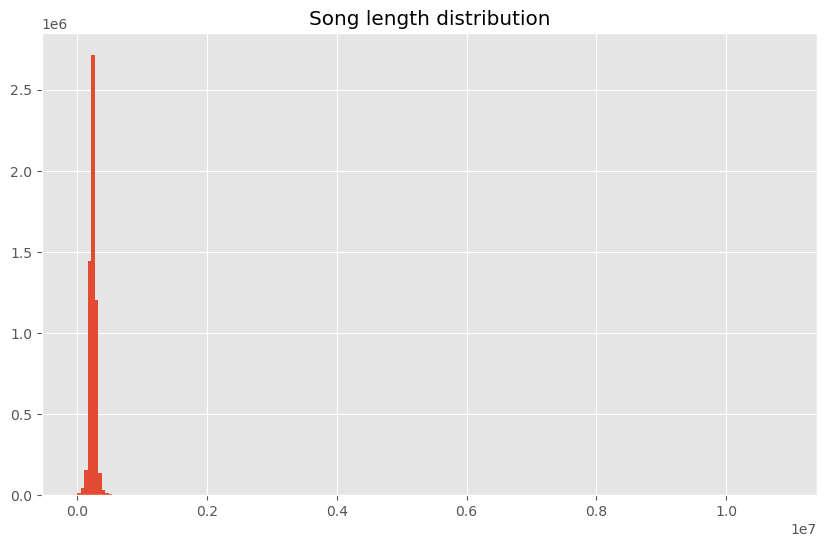

In [37]:
plt.figure(figsize=(10,6))
plt.hist(combined['song_length'].dropna(), bins = 200)
plt.title("Song length distribution")
plt.show()

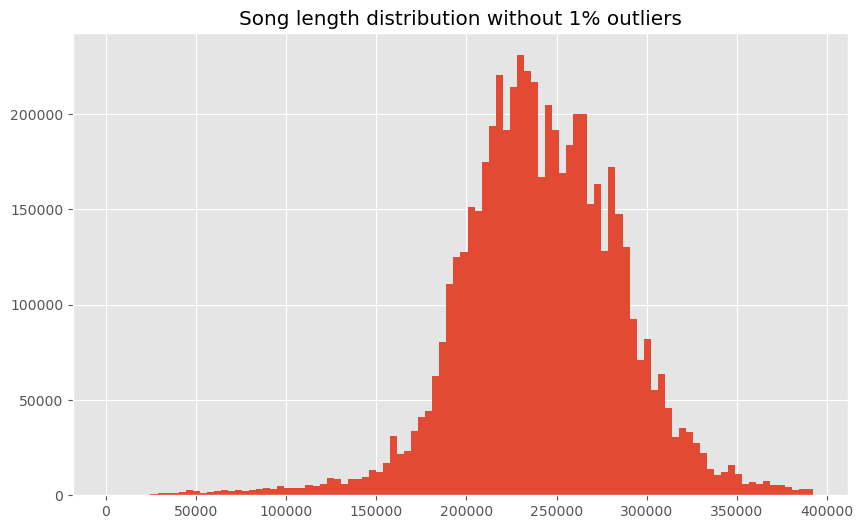

In [38]:
plt.figure(figsize=(10,6))
plt.hist(combined['song_length'].dropna()[combined['song_length'].dropna()<np.quantile(combined['song_length'].dropna(), .99)], bins = 100)
plt.title("Song length distribution without 1% outliers")
plt.show()

<div style="text-align:justify">
It seem like there some subtantial outliers in this variable. Thus, we will replace null value with the median in stead of the mean.
</div>

In [39]:
train_cleaned.dropna(subset=['song_length'], inplace = True)
test_cleaned['song_length'].fillna((combined['song_length'].median()), inplace=True)

In [40]:
# Delete unecessary dataframe to free the the memory storage
del combined

##### Missing target in training set

<div style="text-align:justify">
There is one missing value for target in the training set. Since this is our dependent variable, we will delete that observations.
</div>

In [41]:
train_cleaned = train_cleaned.dropna(subset=['target'])

## **III. Explanatory Data Analysis**

### Explore the users

#### Age group & gender distribution

In [42]:
# Define a function to categorize age
def categorize_age(x):
  if type(x) == int:
      if x >= 100:
          return 'The greatest generation'
      elif 100 > x >= 60:
          return 'Baby boomer'
      elif 60 > x >= 45:
          return 'Gen X'
      elif 45 > x >= 30:
          return 'Millennials'
      elif 30 > x >= 12:
          return 'Gen Z'
      elif 12 > x > 0:
          return 'Gen Z'
      else:
          return np.nan
  else:
    return np.nan

# Apply the categorize_age function to the 'bd' column
members_df['age_category'] = members_df['bd'].apply(categorize_age)

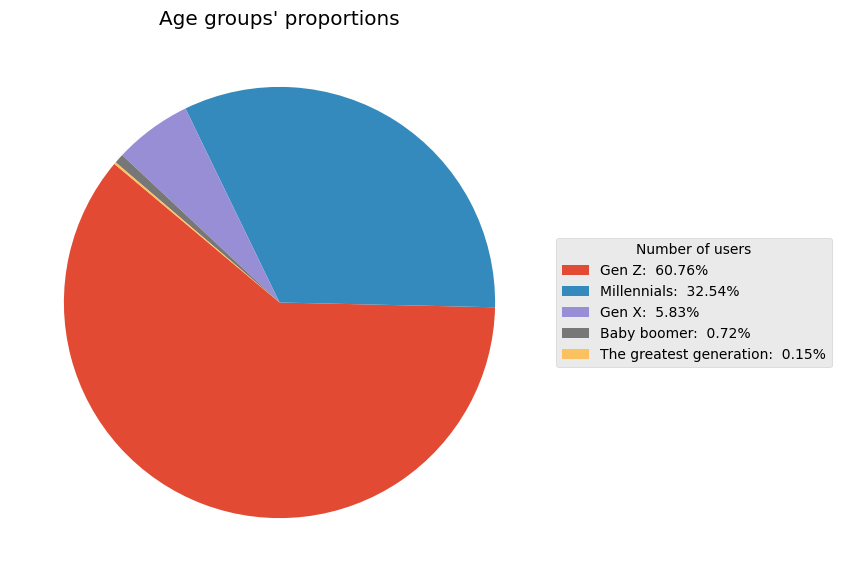

In [43]:
# Count the occurrences of each age category
age_category_counts = members_df['age_category'].dropna().value_counts()

plt.figure(figsize=(10, 7))
patches, texts = plt.pie(age_category_counts, startangle=140)

plt.title("Age groups' proportions")
plt.legend(patches, labels=[f'{label}: {count*100/age_category_counts.sum(): .2f}%' for label, count in zip(age_category_counts.index, age_category_counts)], title="Number of users", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [44]:
# Delete unecessary dataframe to free the memory storage
del age_category_counts

<div style="text-align:justify">
For better analysis, we have categorized users' ages into five age groups: Gen Z (individuals born roughly between the mid-1990s to early 2010s), Millennials (born approximately between 1981 and 1996), Gen X (born roughly between the mid-1960s and early 1980s), Baby Boomers (individuals born between 1946 and 1964), and The Greatest Generation (those born roughly between 1901 and 1927) (Age range by generation, 2024). Observing the pie chart, Gen Z comprises the largest proportion of KKBox users, accounting for approximately 60.76% of the user base. Meanwhile, Millennials and Gen X together make up a significant portion of KKBox users, with Millennials accounting for 32.54% and Gen X for 5.83%. The dominance of Gen Z users on KKBox highlights KKBox's appeal to younger generations. This trend aligns with broader patterns observed in the streaming services industry, where younger demographics exhibit higher engagement with digital music platforms (Thuhin Khanna R. et al., 2022). Studies and market research also support this observation, highlighting Gen Z's strong preference for streaming services due to factors such as convenience, accessibility, and diverse content offerings (Guo et al., 2023; Naratama & Halim, 2023; Teerasombut et al., 2022)
<br>
<br>
On the other hand,  Baby Boomers and The Greatest Generation together make up the smallest portion of KKBox users, comprising 0.72% and 0.15% respectively. The relatively smaller presence of older demographics also point out that KKBox should focus on capturing the attention of younger audiences.
</div>

#### The relationship between number of plays, chance of repeating and age categories

In [45]:
train_cleaned["age_category"] = train_cleaned['bd'].apply(categorize_age)

In [46]:
def count_target_1(x):
    return (x == 1).sum()

In [47]:
# Group by 'age_category' and calculate mean and count
song_play_by_age = train_cleaned.dropna().groupby("age_category")["target"].agg([count_target_1, 'count'])
song_play_by_age.columns = ["Number of repeat", "Number of play"]
song_play_by_age['Chance of repeating'] = song_play_by_age['Number of repeat']/song_play_by_age['Number of play']

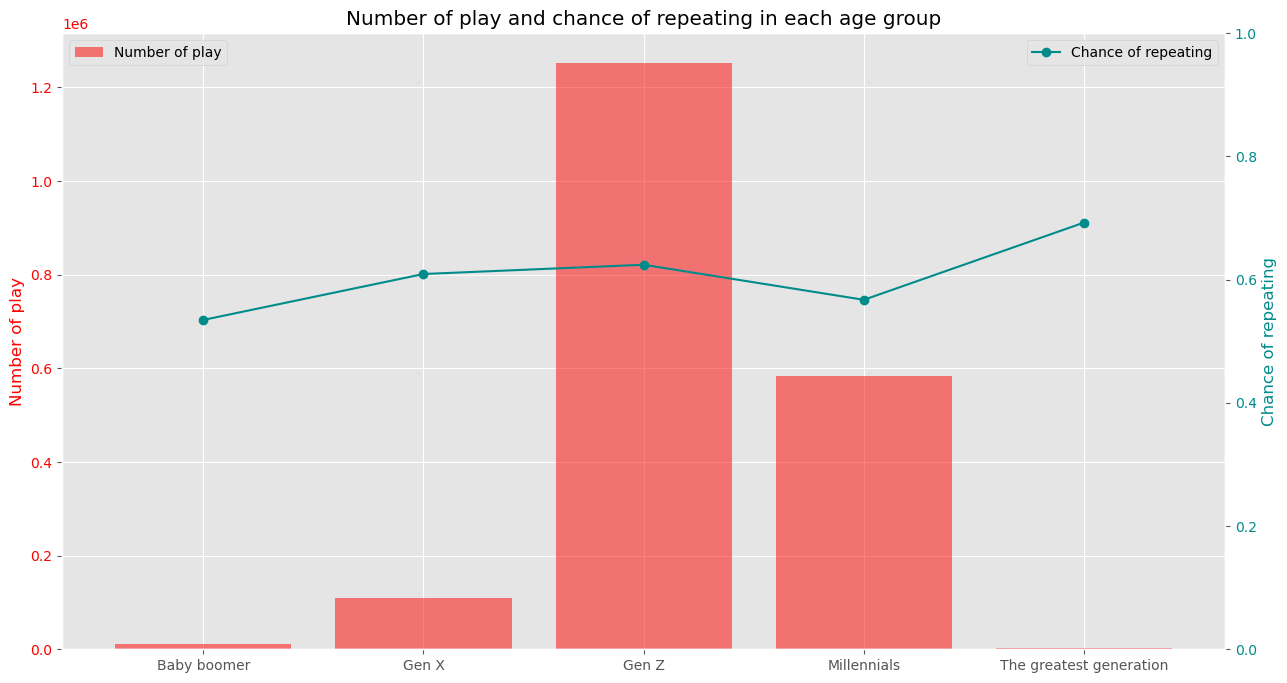

In [48]:
x = song_play_by_age.index
y1 = song_play_by_age["Number of play"]
y2 = song_play_by_age["Chance of repeating"]

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 8))

# Create first y-axis (left)
ax1.bar(x, y1, color='red', alpha=0.5, label='Number of play')
ax1.set_ylabel('Number of play', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')

# Create second y-axis (right)
ax2 = ax1.twinx()
ax2.plot(x, y2, color='darkcyan', marker='o', label='Chance of repeating')
ax2.set_ylim(0, 1)
ax2.set_ylabel('Chance of repeating', color='darkcyan')
ax2.tick_params(axis='y', labelcolor='darkcyan')
ax2.legend(loc='upper right')

ax2.grid(False)
# Show plot
plt.title('Number of play and chance of repeating in each age group')
plt.show()

<div style="text-align:justify">
This indicates that Gen Z users exhibit the highest number of plays, with a double margin compared to Millennials. This suggests that Gen Z users are the most active in consuming music on the platform. Conversely, the number of plays by Baby Boomers, Gen X, and The Greatest Generation users is negligible in comparison to Gen Z and Millennials. This indicates that these older age groups are less engaged with the platform in terms of music consumption.
<br>
<br>
Considering the chance of repeating by age groups, it can be calculated as:
<br>
<br>
$\text{Chance of repeating} = \frac{\text{Number of plays that are recurring within one month}}{\text{Total number of play}}$
<br>
<br>
The data suggests that there is a relatively similar chance of repeating among different age groups, with only slight variations. Notably, The Greatest Generation demonstrates the highest chance of repeating. However, it can be explained by the fact that they do not use this platform too often. On the other hand, Baby Boomers exhibit the lowest chance of repeating, suggesting lower levels of retention and engagement among this demographic.
<br>
<br>
In conclusion, to foster user retention and engagement on platforms like KKBox, prioritizing personalized recommendations, diverse content, and targeted engagement strategies, particularly for younger demographics like Gen Z and Millennials, is crucial. It would help KKBox to better catch user preferences and maintain a competitive edge in the digital entertainment industry.
</div>

In [49]:
# Drop unecessary columns
train_cleaned.drop(columns=['age_category'], inplace = True)
# Delete unecessary dataframe to free the memory storage
del song_play_by_age

#### The relationship between number of plays, chance of repeating and genders

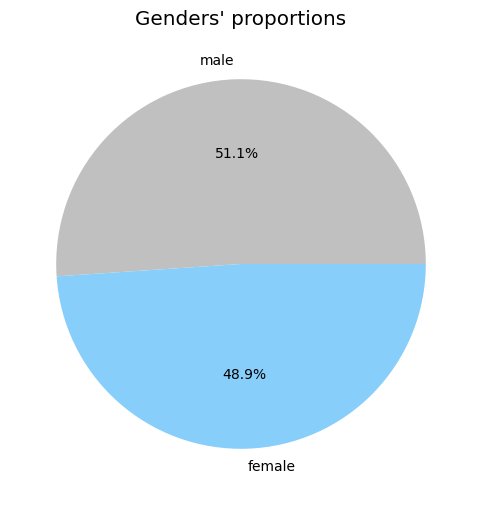

In [50]:
# Count the occurrences of each gender category
gender_counts = members_df['gender'].value_counts()

# Plot the distribution as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['silver', 'lightskyblue', 'pink'])

# Set plot title
plt.title("Genders' proportions")

# Show plot
plt.show()

In [51]:
song_play_by_gender = train_cleaned[train_cleaned['gender']!="Unknown"].groupby("gender")["target"].agg([count_target_1, 'count'])
song_play_by_gender.columns = ["Number of repeat", "Number of play"]
song_play_by_gender['Chance of repeating'] = song_play_by_gender["Number of repeat"]/song_play_by_gender["Number of play"]

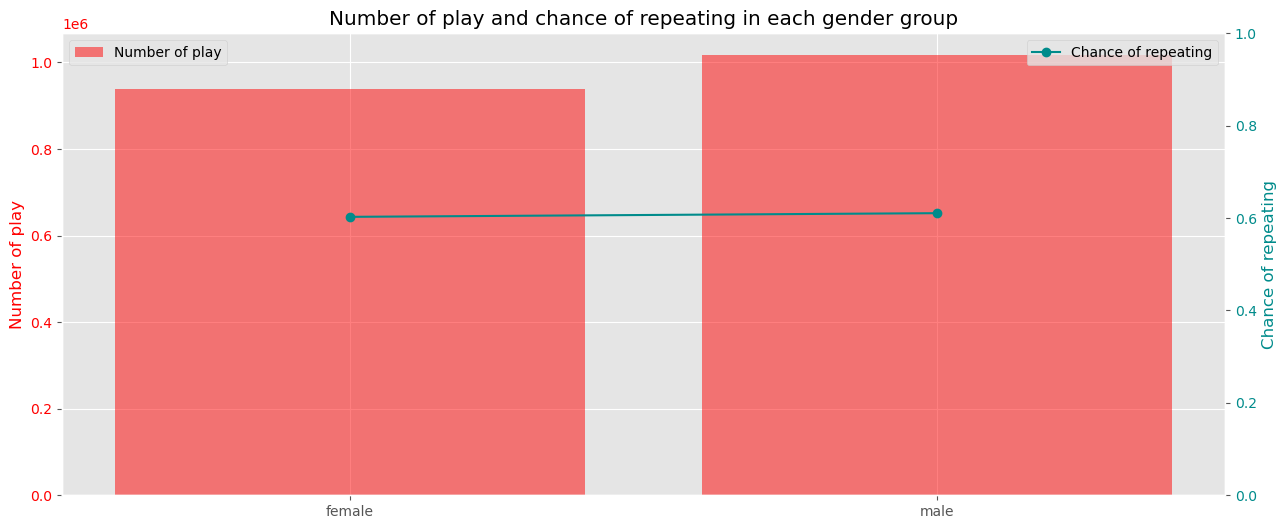

In [52]:
x = song_play_by_gender.index
y1 = song_play_by_gender["Number of play"]
y2 = song_play_by_gender["Chance of repeating"]

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create first y-axis (left)
ax1.bar(x, y1, color='red', alpha=0.5, label='Number of play')
ax1.set_ylabel('Number of play', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')

# Create second y-axis (right)
ax2 = ax1.twinx()
ax2.plot(x, y2, color='darkcyan', marker='o', label='Chance of repeating')
ax2.set_ylim(0, 1)
ax2.set_ylabel('Chance of repeating', color='darkcyan')
ax2.tick_params(axis='y', labelcolor='darkcyan')
ax2.legend(loc='upper right')

ax2.grid(False)
# Show plot
plt.title('Number of play and chance of repeating in each gender group')
plt.show()

<div style="text-align:justify">
According to the pie chart named “Gender’s proportions”, the distribution of user gender reveals a fairly balanced representation, with "Male" users accounting for 51.1% and "Female" users accounting for 48.9% of the total user base. Looking at figure 4, it is evident that the data for each gender is quite similar and there is not a significant difference. This balance suggests that engagement patterns are consistent across different gender identities.
</div>

In [53]:
# Delete unecessary dataframe to free the memory storage
del song_play_by_gender

### Explore the songs

#### Top 5 Countries have most played songs

In [54]:
def isrc_to_country(isrc):
    if isrc != "Unknown":
        return isrc[:2]
    else:
        return "Unknown"

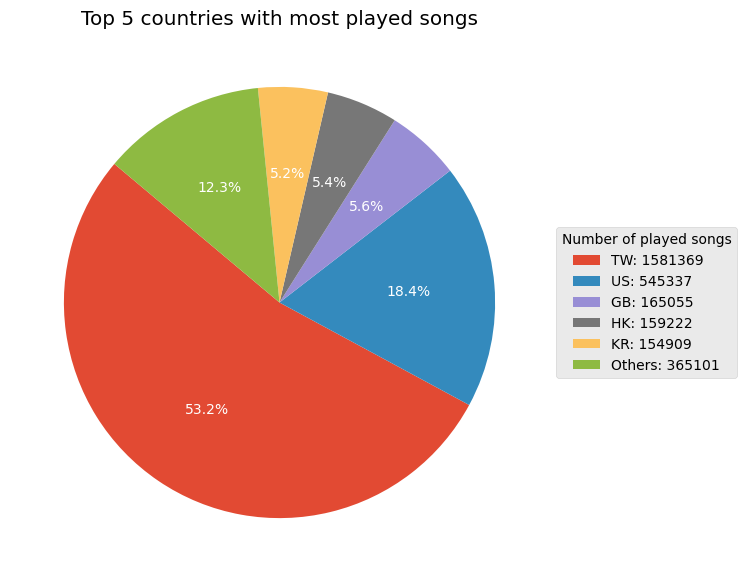

In [56]:
train_cleaned['country_code'] = train_cleaned['isrc'].apply(isrc_to_country)

country_counts = train_cleaned[train_cleaned['country_code'] != "Unknown"]['country_code'].value_counts()
top_countries = country_counts.head(5)
remain_count = pd.Series(country_counts).sort_values(ascending=False)[5:].sum()

final_counts = top_countries._append(pd.Series(remain_count, index=['Others']))

plt.figure(figsize=(10, 7))
patches, texts, autotexts = plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Top 5 countries with most played songs')
for text in texts + autotexts:
    text.set_color('white')

plt.legend(patches, labels=[f'{label}: {count}' for label, count in zip(final_counts.index, final_counts)], title="Number of played songs", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [57]:
# Delete unecessary dataframe to free the memory storage
del country_counts, top_countries, remain_count, final_counts

<div style="text-align:justify">
During the period from 2004 - 2017, the proportion of countries with songs most played on KKBOX platform in the descending  order is Taiwan, the United States, Great Britain, HongKong and finally Korea.
<br>
<br>
&#8226 <b>Leading</b> is <b>Taiwan</b> with a total number of play times of <b>1.581.375</b>, accounting for <b>53,2%</b>
<br>
&#8226 <b>Second</b> is <b>The United States</b> with a total number of play times of <b>545.352</b>, accounting for <b>18,4%</b>
<br>
&#8226 Ranked <b>third</b> with the total number of songs played is <b>Great Britain</b> with a total number of play times of <b>165.057</b>, accounting for <b>5,6%</b>
<br>
&#8226 The 2 remain positions are consecutively <b>HongKong</b> and <b>Korean</b>
<br>
<br>
The distribution of countries having the most played songs  on KKBOX reflects various factors including cultural preferences, market size, music industry infrastructure, and regional popularity of the streaming service. The dominance of Taiwan, the US, Great Britain, Hong Kong, and South Korea in KKBOX's music releases unveils a strategic distribution approach likely driven by a combination of factors:
<br>
<br>
<b>Taiwan:</b>
<br>
<br>
&#8226 Taiwan is the <b>home country</b> of KKBOX, where the streaming service originated. As such, it has a significant user base and a deeply entrenched presence in the local market.
<br>
&#8226 Taiwanese listeners have diverse musical preferences, ranging from Mandopop (Mandarin pop) to Hokkien pop and indigenous music. KKBOX caters to these preferences by offering a wide selection of local and international music (Yang, 1993) .
<br>
&#8226 KKBOX actively promotes Taiwanese artists and music through curated playlists, promotional campaigns, prestigious award (KKBOX Music Award), and exclusive content, further driving engagement and song plays among local users (Shona, 2016).
<br>
<br>
<b> United States:</b>
<br>
<br>
&#8226 The United States is one of the largest and most influential music markets globally, with a diverse range of genres and artists.
<br>
&#8226 KKBOX has a significant user base in the US, where it serves as a popular platform for streaming music. American listeners, contribute to a large number of song plays on KKBOX.
.
<br>
<br>
<b> Great Britain:</b>
<br>
<br>
&#8226 Great Britain, particularly the United Kingdom, has a rich musical heritage and is known for producing globally renowned artists across various genres.
British music enjoys popularity worldwide, and KKBOX caters to the preferences of listeners in the UK and beyond by offering a diverse selection of British music.
<br>
<br>
<b>Hong Kong:</b>
<br>
<br>
&#8226 Hong Kong shares cultural ties with Taiwan and has a vibrant music scene encompassing Canto-pop (Cantonese pop), Mandopop, and international music (Sacco et al., 2009).
<br>
&#8226 KKBOX has established a strong presence in Hong Kong, where it serves as a popular platform for streaming music. HongKong was the <b>first</b> overseas market of KKBOX (KKBOX, 2008). With a long time development, local users in Hong Kong contribute to a significant number of song plays on
<br>
<br>
<b> South Korea </b>:
<br>
<br>
&#8226 South Korea has emerged as a global hub for music, particularly with the rise of K-pop, called <b>Hallyu</b>, which enjoys widespread popularity among international audiences ( (Howard, 2015).
<br>
&#8226 KKBOX has a dedicated user base of K-pop enthusiasts who contribute to a large number of Korean songs played on the platform. This can be explained by the huge impact of <b>"fandom culture in KPOP"</b>, which has been considered perfectly loyal relationship over years. Korean idol fandom strategically employs efforts to boost their idols' achievement (Chart ranking, public recognition, etc.) hence directly to the number of Korean songs played on KKBOX
<br>
<br>
Overall, we can see that the distribution of songs played on KKBOX across these countries is influenced by a combination of factors, including the platform's popularity, cultural relevance, music industry partnerships, and user engagement strategies. KKBOX's efforts to cater to diverse musical tastes and promote both local and international music contribute to its success in these key markets.
</div>

#### Most Popular Artists by Number of Play

(-0.5, 799.5, 399.5, -0.5)

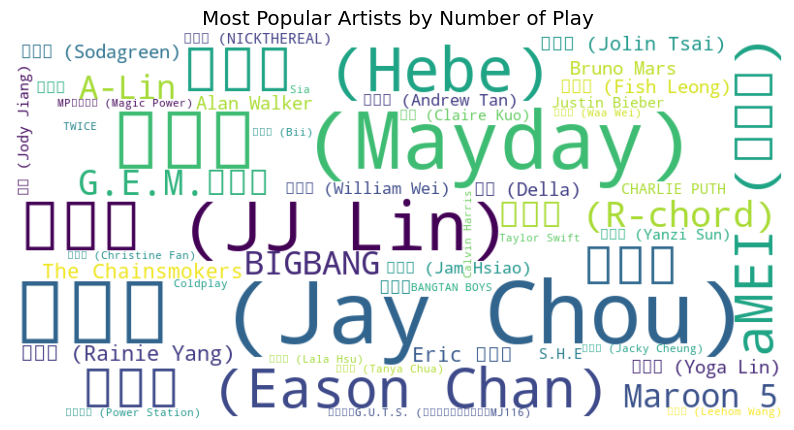

In [58]:
# Count the occurrences of each artist
artist_counts = train_cleaned[train_cleaned['artist_name'] != 'Various Artists']['artist_name'].value_counts()

# Sort the artists based on their occurrence counts
top_artists = artist_counts.head(50)

artist_counts_dict = top_artists.to_dict()
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(artist_counts_dict)


# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Popular Artists by Number of Play')
plt.axis("Off")

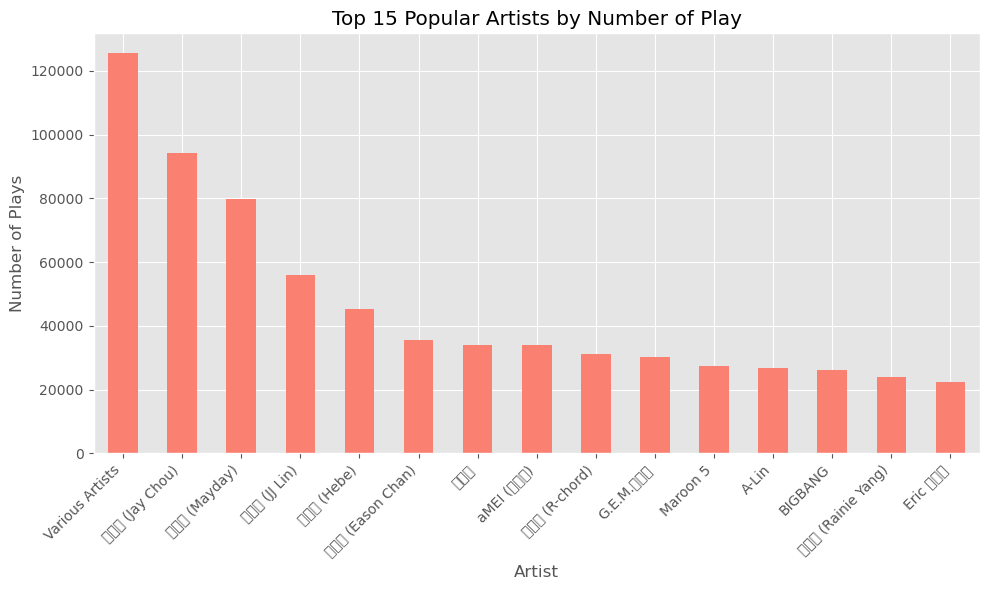

In [59]:
# Count the occurrences of each artist
artist_counts = train_cleaned['artist_name'].value_counts()

# Sort the artists based on their occurrence counts
top_artists = artist_counts.head(15)
# Plot the top popular artists
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='salmon')
plt.title('Top 15 Popular Artists by Number of Play')
plt.xlabel('Artist')
plt.ylabel('Number of Plays')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [60]:
# Delete unecessary dataframe to free the memory storage
del artist_counts, top_artists

As can be seen from the graph above, the highest number of playtime belongs to “Various Artists”. This can mainly be explained by the <b> large number </b> of songs on KKBOX are titled “Various Artists”. Listing every artist on a song with many features could become cumbersome and lead to <b> cluttered data management </b>, so KKBOX might choose "Various Artists" to  <b> simplify </b> this process. Some platforms might manage to display a limited number of featured artists alongside "Various Artists" to strike a balance between data simplicity and recognition. In some cases, <b> copyright ownership </b> for a song with numerous artists can be complex. Using "Various Artists" might be a way to avoid potential copyright attribution issues.


#### Most popular artists to each *gender*

In [61]:
# Count the occurrences of each artist
artist_counts_female = train_cleaned[train_cleaned['artist_name'] != 'Various Artists'][train_cleaned["gender"] == "female"]['artist_name'].value_counts()
artist_counts_male = train_cleaned[train_cleaned['artist_name'] != 'Various Artists'][train_cleaned["gender"] == "male"]['artist_name'].value_counts()

# Sort the artists based on their occurrence counts
top_artists_female = artist_counts_female.head(15)
top_artists_male = artist_counts_male.head(15)

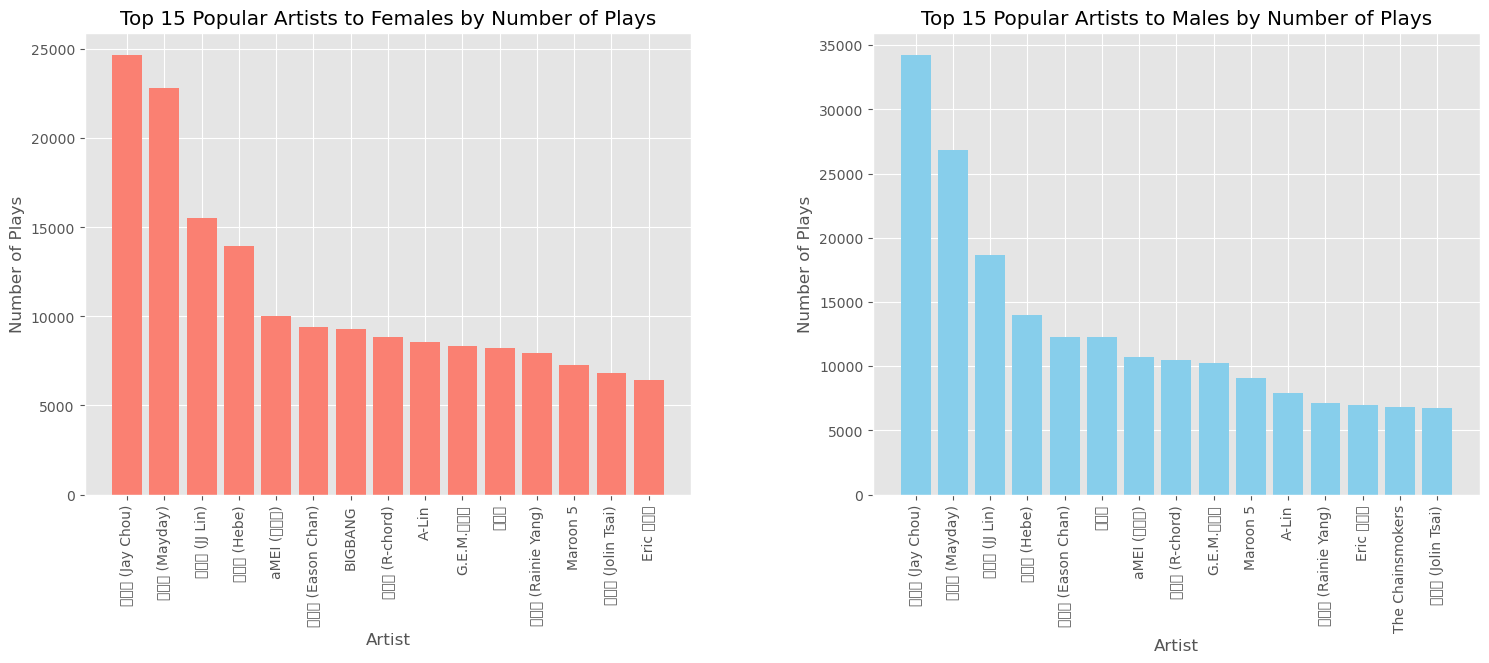

In [62]:
# Plot the top popular artists
fig, axs = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'wspace': 0.3})

# Plot for female artists
axs[0].bar(top_artists_female.index.str.replace('\$\$','\\$\\$'), top_artists_female, color='salmon')
axs[0].set_title('Top 15 Popular Artists to Females by Number of Plays')
axs[0].set_xlabel('Artist')
axs[0].set_ylabel('Number of Plays')
axs[0].tick_params(axis='x', rotation=90)

# Plot for male artists
axs[1].bar(top_artists_male.index.str.replace('\$\$','\\$\\$'), top_artists_male, color='skyblue')
axs[1].set_title('Top 15 Popular Artists to Males by Number of Plays')
axs[1].set_xlabel('Artist')
axs[1].set_ylabel('Number of Plays')
axs[1].tick_params(axis='x', rotation=90)

plt.show()

<div style="text-align:justify">
By <b>separating most popular artists into 2 plots for male and female,</b> we can see the difference in each gender preference.
<br>
<br>
However, the top 4 most popular artists including Jay Chou, Mayday, JJ Lin, and Hebe share the same pattern. This can <b>imply that the top-notch popular artists are not biased by gender but have to be popular to both.</b>
<br>
<br>
It's worth noting that <b>BIGBANG</b>, a famous Korean boy band, is popular among female listeners, and not even in the male's top preference.BIGBANG’s music blends various genres, including pop, hip-hop, and electronic dance music (EDM). Their energetic performances, catchy tunes, and charismatic personalities have won them a massive fan base, typically female listeners. Their emotional ballads, powerful vocals, and stylish visuals resonate with fans who appreciate their blend of music and fashion.
<br>
<br>
And on the other hand, males seem to listen to many songs from <b>The Chainsmokers,</b> an American DJ and production duo, specialize in EDM, pop, and electronic music. Their tracks often feature collaborations with popular vocalists, combining with their upbeat, party-friendly tracks resonate with young adults who enjoy electronic beats and catchy melodies.
<br>
<br>
Noting the <b>difference in preference between the two genders can contribute to a more precise music recommendation system</b> for the target users.
</div>

In [63]:
# Delete unecessary dataframe to free the memory storage
del artist_counts_female, artist_counts_male, top_artists_female, top_artists_male

#### Most popular songs to each gender

In [64]:
# Count the occurrences of each song
song_counts_female = train_cleaned[train_cleaned["gender"] == "female"]['name'].value_counts()
song_counts_male = train_cleaned[train_cleaned["gender"] == "male"]['name'].value_counts()

# Sort the songs based on their occurrence counts
top_song_female = song_counts_female.head(15)
top_song_male = song_counts_male.head(15)

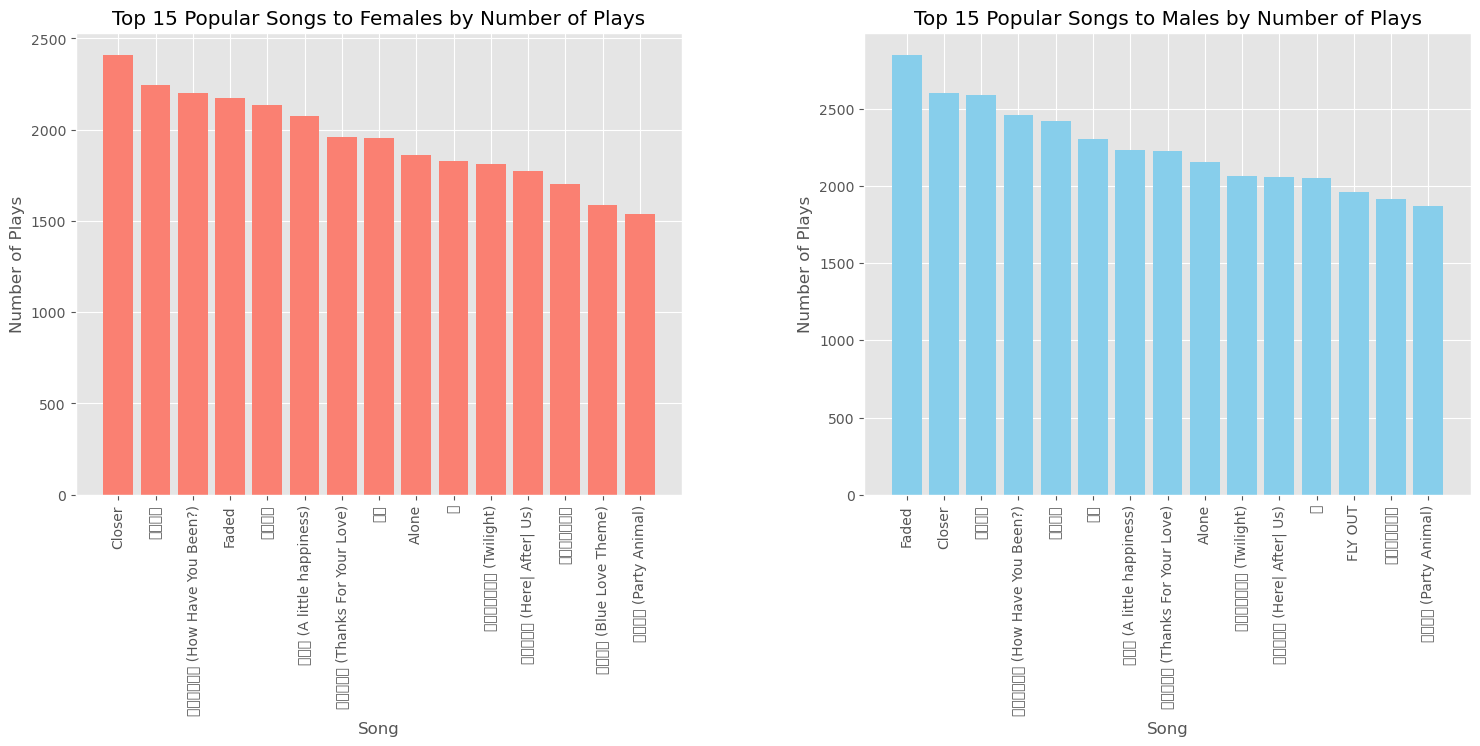

In [65]:
# Plot the top popular artists
fig, axs = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'wspace': 0.3})

# Plot for female artists
axs[0].bar(top_song_female.index.str.replace('\$\$','\\$\\$'), top_song_female, color='salmon')
axs[0].set_title('Top 15 Popular Songs to Females by Number of Plays')
axs[0].set_xlabel('Song')
axs[0].set_ylabel('Number of Plays')
axs[0].tick_params(axis='x', rotation=90)

# Plot for male artists
axs[1].bar(top_song_male.index.str.replace('\$\$','\\$\\$'), top_song_male, color='skyblue')
axs[1].set_title('Top 15 Popular Songs to Males by Number of Plays')
axs[1].set_xlabel('Song')
axs[1].set_ylabel('Number of Plays')
axs[1].tick_params(axis='x', rotation=90)

plt.show()

<div style="text-align:justify">
Due to the fact that there are some symbolic characters that cannot be written in the font, the team has decided to use the "print" command.
</div>

In [66]:
top_song_female = pd.DataFrame(top_song_female).reset_index()
top_song_female.columns = ['Name', 'Count']
print("Top 15 Popular Songs to Female by Number of Plays")
top_song_female

Top 15 Popular Songs to Female by Number of Plays


,Name,Count
0,Closer,2411
1,告白氣球,2245
2,你，好不好？ (How Have You Been?),2200
3,Faded,2172
4,帥到分手,2138
5,小幸運 (A little happiness),2073
6,謝謝妳愛我 (Thanks For Your Love),1960
7,不該,1957
8,Alone,1862
9,默,1828


In [67]:
top_song_male = pd.DataFrame(top_song_male).reset_index()
top_song_male.columns = ['Name', 'Count']
print("Top 15 Popular Songs to Male by Number of Plays")
top_song_male

Top 15 Popular Songs to Male by Number of Plays


,Name,Count
0,Faded,2849
1,Closer,2603
2,告白氣球,2585
3,你，好不好？ (How Have You Been?),2457
4,帥到分手,2420
5,不該,2303
6,小幸運 (A little happiness),2231
7,謝謝妳愛我 (Thanks For Your Love),2225
8,Alone,2156
9,不為誰而作的歌 (Twilight),2062


<div style="text-align:justify">
By segregating the most popular songs into two plots based on gender, we can discern the variations in preferences between males and females. Interestingly, <b>he top 5 most popular songs, including "Closer," "告白氣球," "你，好不好？" (How Have You Been?), "Faded," and "帥到分手," exhibit a consistent pattern across genders</b>. This suggests that these highly popular songs appeal universally rather than being influenced by gender bias.
<br>
<br>
<b>"Closer" by Halsey emerges as particularly favored among females</b> due to its themes of love, connection, and vulnerability. The lyrics resonate with the complexities of romantic relationships, fostering relatability among listeners. Moreover, Halsey's emotive performance enhances the song's impact, contributing to its widespread popularity among female audiences.
<br>
<br>
Conversely, <b>"Faded" by Alan Walker garners greater favor among males</b>. Renowned as one of the most popular electronic dance music (EDM) tracks, "Faded" captivates with its catchy beat, memorable lyrics, and captivating music video. Its widespread remixes and enduring presence in DJ sets further solidify its status as an EDM classic, making it a staple among male listeners.
<br>
<br>
Recognizing these gender-based preferences can enhance the precision of music recommendation systems tailored to specific user demographics.
</div>

In [68]:
# Delete unecessary dataframe to free the memory storage
del song_counts_female, song_counts_male, top_song_female, top_song_male

#### Top Artist with highest chance of repeating

In [ ]:
<div style="text-align:justify">
To identify the top artists with the most dedicated fan base (a large number of loyal listeners who repeatedly listen to their songs), we decided to examine the chance of repeating, computed based on the total number of repeats across all of the artist's songs.

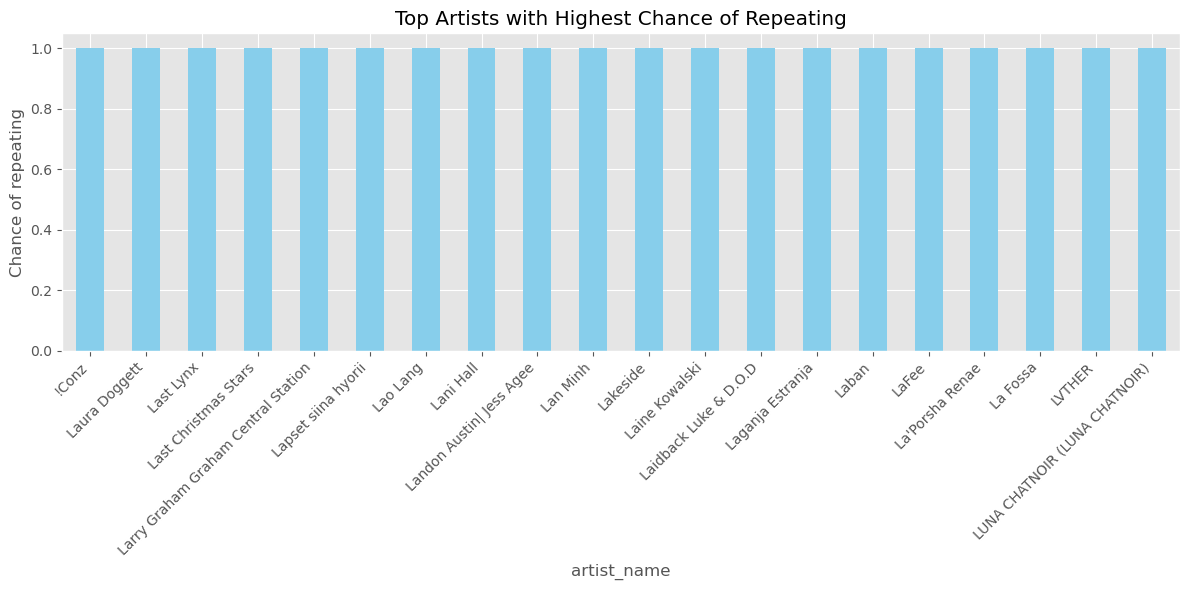

In [69]:
# Group by artist_name and calculate the repeating rate
repeating_rate = train_cleaned.groupby('artist_name')['target'].agg([count_target_1, 'count'])
repeating_rate.columns = ["Number of repeat", "Number of play"]
repeating_rate['chance_of_repeating'] = repeating_rate['Number of repeat']/repeating_rate['Number of play']
# Sort the artists based on repeating rate
top_artists = repeating_rate['chance_of_repeating'].sort_values(ascending=False).head(20)


# Plot the top artists and their repeating rates
plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.title('Top Artists with Highest Chance of Repeating')
# plt.xlabel('Artist')
plt.ylabel('Chance of repeating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<div style="text-align:justify">
The plot shows top artists with highest chance of repeating, which are exactly equal to 1. This can imply the assumption that: the artists only have one or very few listeners that they all repeat their songs, resulting in a perfect chance of repeating. However, it's essential to note that this observation doesn't necessarily align with our objective of identifying artists with a large and high-quality fan base. Instead, it highlights the importance of applying appropriate filtering and conditions to the data before drawing conclusions.
<br>
<br>
If we solely sort the data without any filtering or conditions, we might overlook artists with a significant number of plays and a substantial fan base, as the focus would primarily be on artists with a perfect chance of repeating.
<br>
<br>
Therefore, it's crucial to carefully analyze the data and apply relevant filters to ensure that our findings accurately reflect the characteristics of artists with loyal and engaged listeners.
<br>
<br>
We decided to look broader by adding numbers of plays to the plot.
</div>

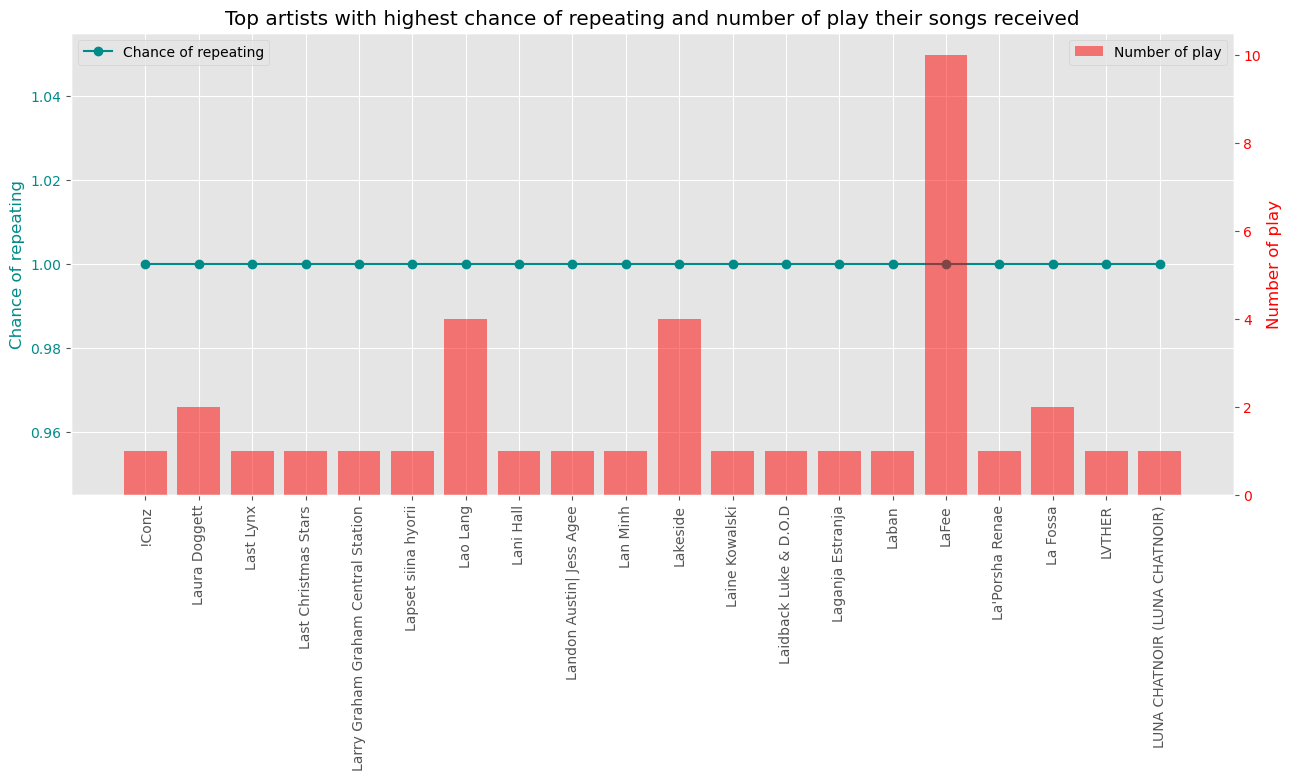

In [70]:
x = top_artists.index
y1 = top_artists.values
y2 = {'artist': list(top_artists.index), 'Number of play': []}
for artist in y2['artist']:
  y2['Number of play'].append(repeating_rate[repeating_rate.index == artist]['Number of play'][0])
y2 = y2['Number of play']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create first y-axis (left)
ax1.plot(x, y1, color='darkcyan', marker='o', label='Chance of repeating')
plt.xticks(rotation=90)

# ax1.set_xlabel('Top artists with highest chance of repeating')
ax1.set_ylabel('Chance of repeating', color='darkcyan')
ax1.tick_params(axis='y', labelcolor='darkcyan')
ax1.legend(loc='upper left')

# Create second y-axis (right)
ax2 = ax1.twinx()
ax2.bar(x, y2, color='red', alpha=0.5, label='Number of play')
plt.xticks(rotation=90)

ax2.set_ylabel('Number of play', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')
ax2.grid(False)

# Show plot
plt.title('Top artists with highest chance of repeating and number of play their songs received')
plt.show()

<div style="text-align:justify">
The observation of the number of plays reveals a key issue: many artists with a high chance of repeating have very few instances where their songs are played, often only once or twice. This situation does not meet our criteria for identifying artists with a large and high-quality fan base.
<br>
<br>
This align with our assumption above, and prompts us to further investigate the distribution of the number of plays. Our next step involves defining a threshold for "low" number of plays based on this distribution to refine our analysis and identify artists that better align with our objectives.
</div>

Text(0.5, 1.0, 'Number of Plays Distribution Below 75th Percentile')

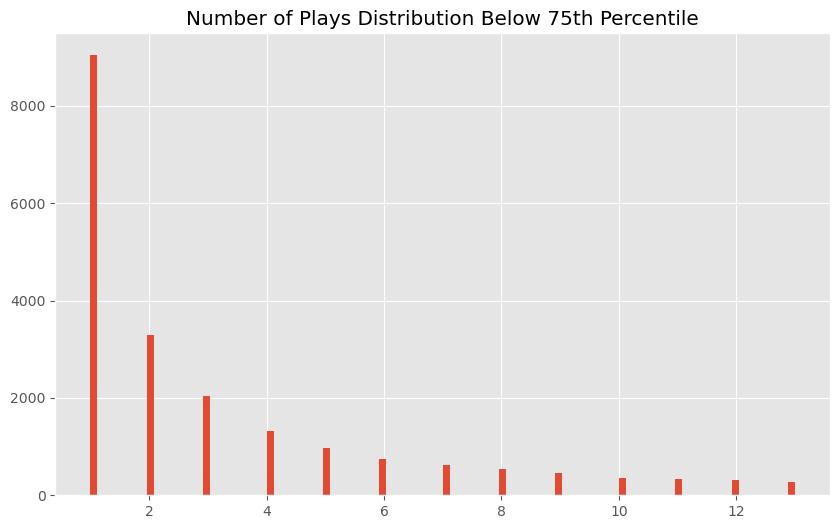

In [71]:
plt.figure(figsize=(10,6))
plt.hist(repeating_rate[repeating_rate['Number of play']<np.quantile(repeating_rate['Number of play'], 0.75)]['Number of play'], bins = 100)
plt.title("Number of Plays Distribution Below 75th Percentile")

<div style="text-align:justify">
Upon observing the distribution of the Number of plays, it's evident that nearly 9000 artists have only one play recorded. This dominance of singular play counts poses a challenge in discerning other values, which are significantly fewer. To address this issue, we conducted multiple iterations with various limits to enhance visualization clarity. Eventually, we defined the threshold for "low" number of plays as those below 10.
</div>

In [72]:
artist_to_remove = list(repeating_rate[repeating_rate['Number of play']<10].index)

<div style="text-align:justify">
Let's observe how the number of plays distribution changes after remove values that is lower than 10.
</div>

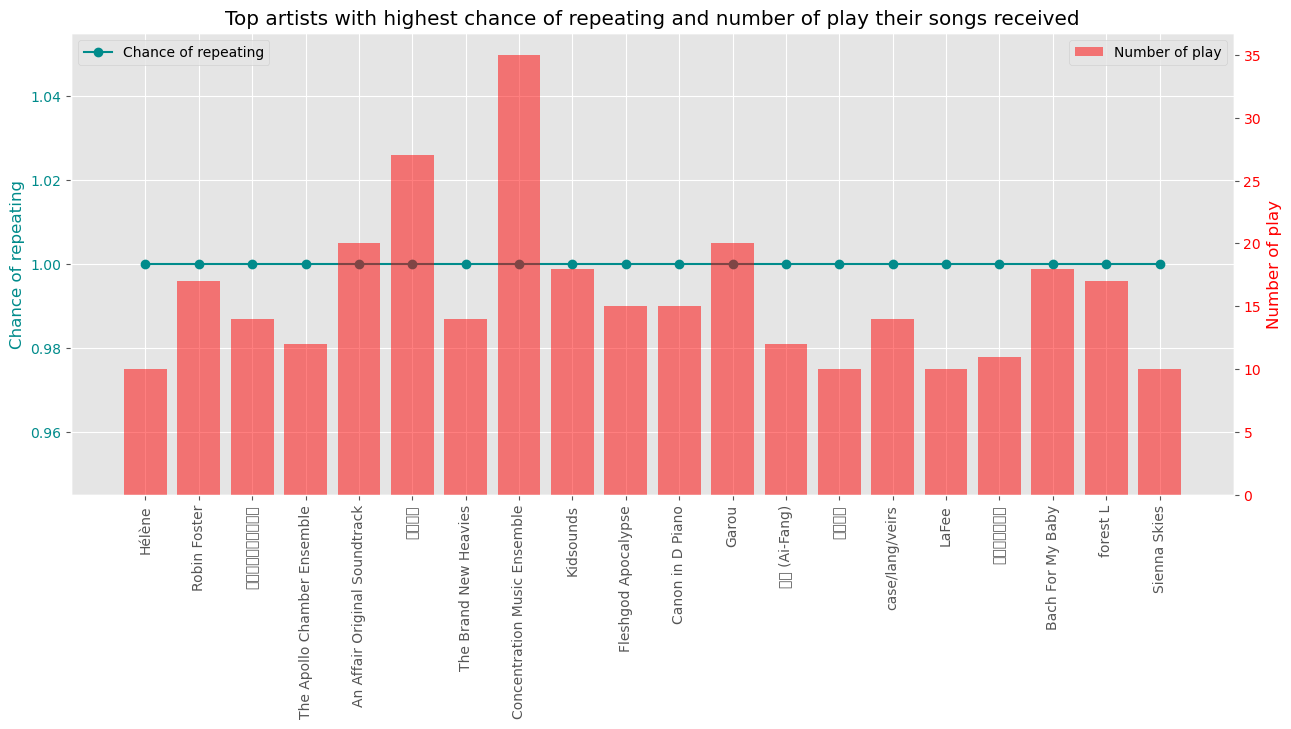

In [73]:
top_artists = repeating_rate[~repeating_rate.index.isin(artist_to_remove)]['chance_of_repeating'].sort_values(ascending=False).head(20)

x = top_artists.index
y1 = top_artists.values
y2 = {'artist': list(top_artists.index), 'Number of play': []}
for artist in y2['artist']:
  y2['Number of play'].append(repeating_rate[repeating_rate.index == artist]['Number of play'][0])
y2 = y2['Number of play']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create first y-axis (left)
ax1.plot(x, y1, color='darkcyan', marker='o', label='Chance of repeating')
plt.xticks(rotation=90)

# ax1.set_xlabel('Top artists with highest chance of repeating')
ax1.set_ylabel('Chance of repeating', color='darkcyan')
ax1.tick_params(axis='y', labelcolor='darkcyan')
ax1.legend(loc='upper left')

# Create second y-axis (right)
ax2 = ax1.twinx()
ax2.bar(x, y2, color='red', alpha=0.5, label='Number of play')
plt.xticks(rotation=90)

ax2.set_ylabel('Number of play', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')
ax2.grid(False)

# Show plot
plt.title('Top artists with highest chance of repeating and number of play their songs received')
plt.show()

<div style="text-align:justify">
With this plot, we greatly appreciate artists whose songs have a number of plays of 10, and all are repeated. This satisfies the loyalty criteria of the fan base that we are seeking.
<br>
<br>
However, we cannot infer that the mentioned groups of listeners are large. It may be resulted the same if one user plays the song 10 times. This cause us to observe the unique users with exactly the same artist group as the above plot. From then we can see if there are any other ways that we can take to successfully filter the artist with the high-quality group of listeners we are seeking.
</div>

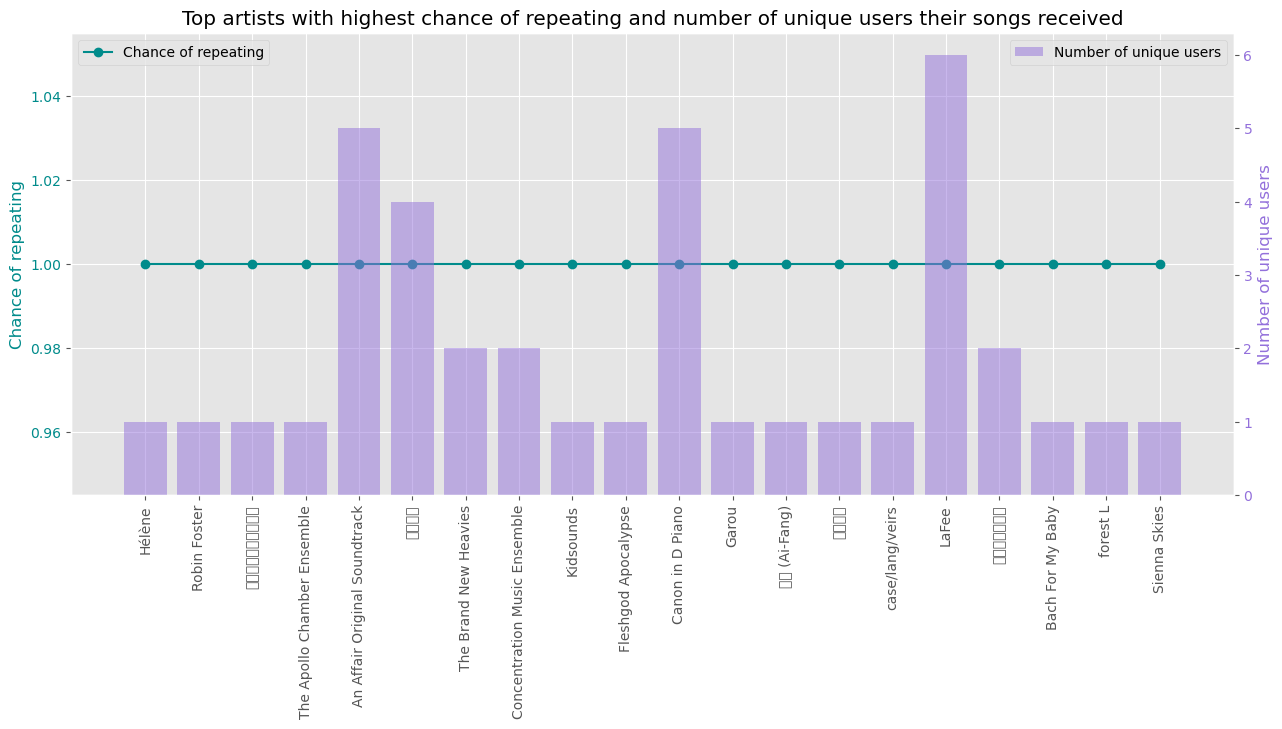

In [77]:
top_artists = repeating_rate[~repeating_rate.index.isin(artist_to_remove)]['chance_of_repeating'].sort_values(ascending=False).head(20)

x = top_artists.index
y1 = top_artists.values
y2 = {'artist': list(top_artists.index), 'Number of unique users': []}
for artist in y2['artist']:
    y2['Number of unique users'].append(train_cleaned[train_cleaned['artist_name']==artist]['msno'].nunique())
y2 = y2['Number of unique users']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create first y-axis (left)
ax1.plot(x, y1, color='darkcyan', marker='o', label='Chance of repeating')
plt.xticks(rotation=90)

# ax1.set_xlabel('Top artists with highest chance of repeating')
ax1.set_ylabel('Chance of repeating', color='darkcyan')
ax1.tick_params(axis='y', labelcolor='darkcyan')
ax1.legend(loc='upper left')

# Create second y-axis (right)
ax2 = ax1.twinx()
ax2.bar(x, y2, color='mediumpurple', alpha=0.5, label='Number of unique users')
plt.xticks(rotation=90)

ax2.set_ylabel('Number of unique users', color='mediumpurple')
ax2.tick_params(axis='y', labelcolor='mediumpurple')
ax2.legend(loc='upper right')
ax2.grid(False)

# Show plot
plt.title('Top artists with highest chance of repeating and number of unique users their songs received')
plt.show()

<div style="text-align:justify">

After analyzing unique users, we hypothesized that a lower number of unique users correlates with a higher probability of a repeating chance equal to 1. However, it's crucial to note that in scenarios with fewer unique users, if even one user doesn't repeat listening, it significantly decreases the chance of repeating. To address this potential bias, we opted to filter out instances where the chance of repeating was a "perfect" 1. This decision was made to mitigate the impact of individual users who may not contribute to repeated listening, thus ensuring a more balanced evaluation of repeating chances.

</div>

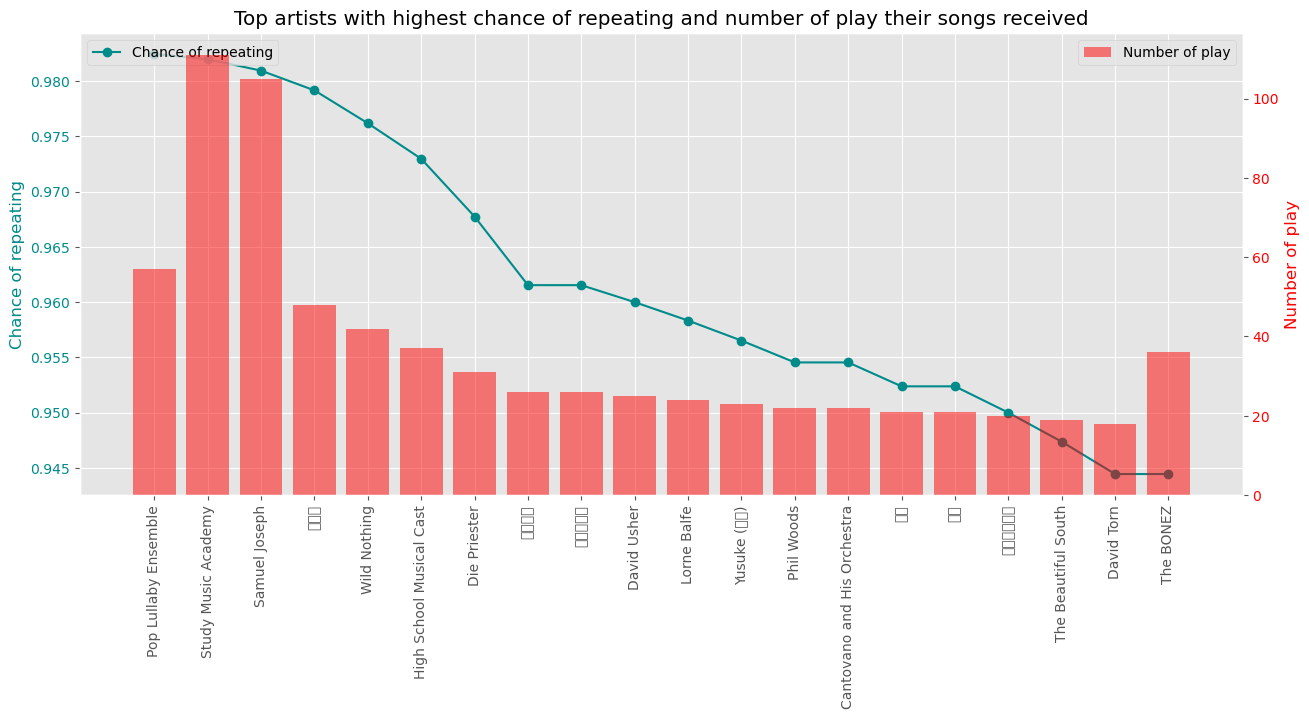

In [78]:
top_artists = repeating_rate[~repeating_rate.index.isin(artist_to_remove)][repeating_rate['chance_of_repeating']!=1]['chance_of_repeating'].sort_values(ascending=False).head(20)

x = top_artists.index
y1 = top_artists.values
y2 = {'artist': list(top_artists.index), 'Number of play': []}
for artist in y2['artist']:
  y2['Number of play'].append(repeating_rate[repeating_rate.index == artist]['Number of play'][0])
y2 = y2['Number of play']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create first y-axis (left)
ax1.plot(x, y1, color='darkcyan', marker='o', label='Chance of repeating')
plt.xticks(rotation=90)

# ax1.set_xlabel('Top artists with highest chance of repeating')
ax1.set_ylabel('Chance of repeating', color='darkcyan')
ax1.tick_params(axis='y', labelcolor='darkcyan')
ax1.legend(loc='upper left')

# Create second y-axis (right)
ax2 = ax1.twinx()
ax2.bar(x, y2, color='red', alpha=0.5, label='Number of play')
plt.xticks(rotation=90)

ax2.set_ylabel('Number of play', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')
ax2.grid(False)
# Show plot
plt.title('Top artists with highest chance of repeating and number of play their songs received')
plt.show()

<div style="text-align:justify">
We have finally arrived at the graph that aligns most with our expectations in our quest to find artists with a loyal and sizable fan base. Interestingly, we observe that artists with a high number of plays may not necessarily have a high-quality group of listeners.
</div>

In [79]:
# Delete unecessary dataframe to free the memory storage
del repeating_rate, top_artists

#### Number of play versus Chance of repeating

<div style="text-align:justify">
To analyze how a song's popularity (number of plays) affects its chance of being played repeatedly, we will rely on a chart showing the correlation between the Number of Plays and Repeat Chance. <b>Overall, two possibilities may occur: (1) The higher the number of plays, the higher the average repeat chance; (2) the lower the number of plays, the greater the variance between the likelihood of being repeated and not repeated,</b> depending on various reasons that will be analyzed below.
</div>

In [80]:
# Group by 'song_id' and calculate mean and count
song_play = train_cleaned.groupby("song_id")["target"].agg([count_target_1, 'count'])

# Rename the columns
song_play.columns = ["Number of repeat", "Number of play"]

In [81]:
# Song that has been played the most
song_play["Repeat chance"] = song_play["Number of repeat"]/song_play["Number of play"]

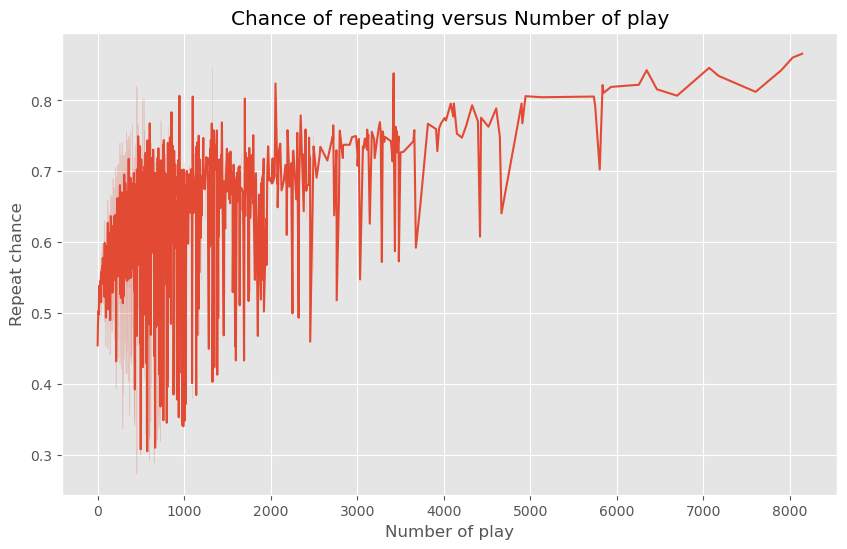

In [82]:
plt.figure(figsize=(10,6))
sns.lineplot(x=song_play["Number of play"], y=song_play["Repeat chance"])
plt.xlabel("Number of play")
plt.ylabel("Repeat chance")
plt.title("Chance of repeating versus Number of play")
plt.show()

In [83]:
# Delete unecessary dataframe to free the memory storage
del song_play

**A. INCREASING NUMBER OF PLAYS AND ELEVATED AVERAGE REPEAT CHANCE**

<div style="text-align:justify">
<b>The popularity of a song fosters a positive feedback loop, heightening the likelihood of it being repeatedly played. This increase can be attributed to exposure and listener behavior.</b> As depicted in the graph, when the Number of plays is close to 0, indicating that the song is not popular, it only receives the highest average repeat chance of over 0.45. However, the general trend is that as the number of plays increases, this chance progressively rises, exemplified by the highest average exceeding 0.8; 0.8+; nearly 0.9 at 1000; 2000; 8000 Number of plays respectively. The reasons for this increase can be attributed to the following factors.
<br>
<br>
<b>The first reason is due to an increase in exposure.</b> Popular songs are more likely to be included on high-traffic playlists and radio stations, increasing their reach and the chances of repeated listens (Morris et al., 2021). <b>The second reason is due to listener behavior.</b> People tend to gravitate towards familiar songs they already enjoy (Ward et al., 2013). Repeated exposure to a popular song makes it more familiar, potentially leading to a listener actively seeking it out again.
</div>

**B. DECREASING NUMBER OF PLAYS AND AMPLIFIED DISPARITY IN REPEAT PROBABILITY**

<div style="text-align:justify">
<b>It is discovered that songs with lower numbers of plays exhibit a wider range of outcomes in terms of repeat likelihood.</b> The lower the number of plays, the greater the variance between the likelihood of being repeated and not repeated. This is demonstrated through the thick candle coverage (ranging from 0.3 to over 0.8) when the number of plays values is below 3500. The reasons for this can be attributed to sampling error, discovery phase dynamics, and niche audiences.
<br>
<br>
<b>The first reason is due sampling error. Songs with lower play counts represent a smaller sample of listeners</b> (Kowald et al., 2021). This means any individual listener's decision to repeat or not repeat the song has a larger impact on the overall percentage of repeat listens. Besides, this can be attributed to statistical fluctuation. With a small sample, statistical fluctuations become more prominent (Wisotzki et al., 2000). A single listener listening to the song multiple times can significantly inflate the repeat listen percentage. Conversely, a single listener who dislikes the song and never listens to it again can significantly decrease the repeat listen percentage.
<br>
<br>
<b>Another reason is due to discovery and nicheness.</b> During the discovery phase, songs with lower play counts are often in the discovery phase. Listeners are just encountering the song for the first time, and their decision to repeat it will depend heavily on their personal preferences for that specific song. Some listeners might find the song highly appealing and repeat it multiple times, while others might find it uninteresting and never revisit it. Moreover, Songs with lower play counts might belong to niche genres with smaller, more dedicated fanbases (Datta et al., 2018). These listeners are more likely to repeatedly listen to a song they enjoy within their preferred genre, but the song might not have broad appeal to a larger audience.
</div>

#### Song length distribution

<div style="text-align:justify">
It has long been discovered that song length (duration) can definitely affect how many times someone repeats a song (Feßl & Hoi, 2000). In this section, we will interpret the distribution of song lengths and their popularity to demonstrate two assertions: that there is a <b>common distribution regarding the time of songs</b> and there is <b>a strong correlation between the length of a song and its playback count.</b>
</div>

In [ ]:
song_length = train_cleaned.groupby("song_id").agg({
    "song_length": "mean",
    "target": lambda x: (x == 1).sum(),  # Count the number of times target = 1
    "song_id": "count"  # Count the number of plays for each song_id
})
song_length.columns = ['Song length', 'Number of repeat', 'Number of play']

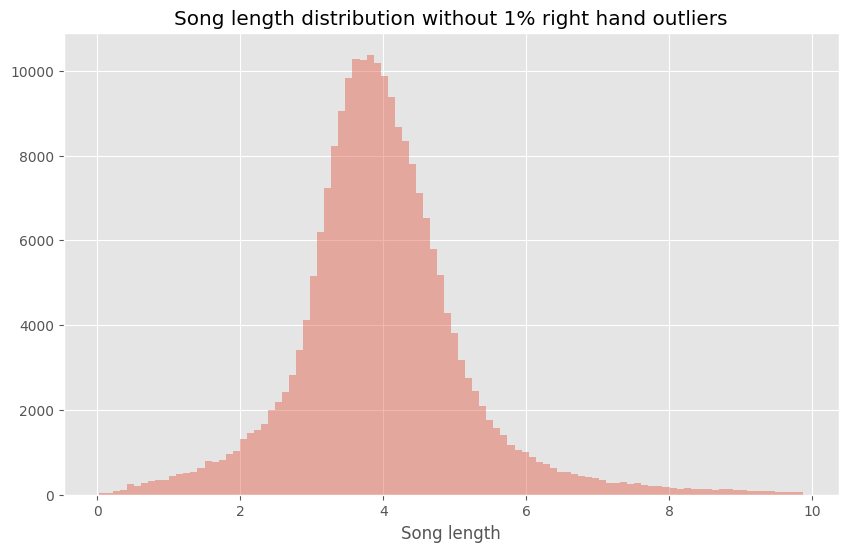

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(song_length[song_length['Song length']<np.quantile(song_length['Song length'],.99)]['Song length']/60000, bins=100, kde=False) # Trim out outliers and convert ms to minutes
plt.title("Song length distribution without 1% right hand outliers")
plt.show()

<div style="text-align:justify">
We observed two trends from the chart: (1) Songs ranging from 3 minutes 30 seconds to nearly 6 minutes constitute the largest proportion, and (2) songs under 3 minutes 30 seconds and over 6 minutes make up a very small percentage.
<br>
<br>
<b>There are two reasons to explain why songs from 3 minutes 30 seconds to nearly 6 minutes constitute the largest proportion.</b> Firstly, <b>analyzing factors influencing listeners, there is a decrease in attention spans.</b> The fast-paced nature of modern life is believed to have contributed to shorter attention spans. Streaming services with vast, on-demand libraries further incentivize listeners to switch songs quickly if they aren't immediately captivated. <b>Besides, there is a shift in consumption habits.</b> The rise of social media platforms like TikTok, which emphasize short-form content, has potentially conditioned listeners to expect quicker musical gratification (Collie & Wilson‐Barnao, 2020). Shorter songs can be more easily digested and shared within these platforms.
<br>
<br>
Secondly, <b>analyzing factors affecting the music industry, streaming service algorithms are being enhanced.</b> Streaming platforms often prioritize songs with higher play-through rates, which can incentivize artists and producers to create shorter, more engaging tracks (Frenneaux & Bennett, 2021). <b>Also, playlist dominance.</b> Playlists curated by streaming services and radio stations often have time constraints, making shorter songs more likely to be included. This pressure to fit within playlists can influence song structure. <b>Moreover, the music industry is witnessing advanced production techniques.</b> Modern music production techniques often favor a more concise and focused approach. This can lead to tighter song structures and less emphasis on extended instrumental sections or outros.
</div>

#### Number of play versus Song Length

<div style="text-align:justify">
The number of songs around 3 minutes and 30 seconds is increasingly being produced and receiving positive feedback from audiences (Logue et al., 2019). <b>We have observed three trends regarding correlations between the duration factor of a song and the number of plays based on data and real-life situations.</b>
</div>

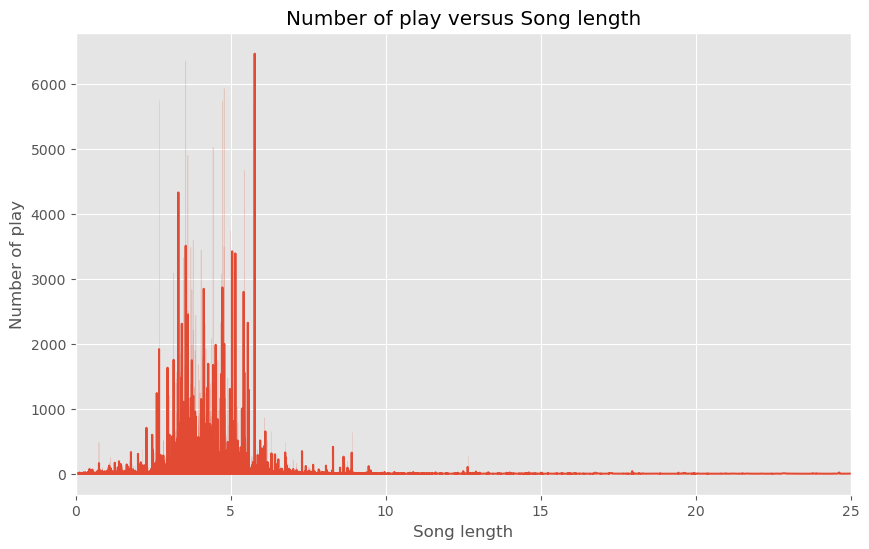

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=song_length["Song length"]/60000, y=song_length["Number of play"])
plt.xlabel("Song length")
plt.ylabel("Number of play")
plt.title("Number of play versus Song length")
plt.xlim(left=0, right=25)  # Set the lower limit of the x-axis to 0 and the upper limit to 25
plt.show()

<div style="text-align:justify">
In general, there are three trends observed from the chart depicting the correlation between song length and number of plays: Songs around 6 minutes receive the most plays; Songs ranging from around 3 minutes and 30 seconds to nearly 6 minutes have the second-highest number of plays and are currently dominant; Songs longer than 6 minutes and under 3 minutes and 30 seconds are not as popular.
<br>
<br>
<b>The first trend is songs around 6 minutes receive the most plays.</b> Firstly, prior to the early 21st century onwards, songs with long durations dominated and were quite abundant, resulting in a high number of plays (over 6500). Such a large number of listens on KKBOX suggests a deeper engagement with music that goes beyond catchy hooks (Negus, 2012). Genres like opera, classical music, and traditional folk ballads often relied on extended structures to tell stories, develop complex emotions, or showcase virtuosity. Listeners might have repeatedly played these songs to fully grasp the narrative or appreciate the musical intricacies. Secondly, longer songs may evoke strong emotional responses or provide a sense of journey or storytelling that resonates with listeners on a deeper level (Juslin & Västfjäll, 2008). Overall, the appeal of long songs lies in their ability to offer a rich and engaging musical experience that transcends simple melodies or hooks.
<br>
<br>
<b>The second trend is songs ranging from around 3 minutes and 30 seconds to nearly 6 minutes have the second-highest number of plays and are currently dominant.</b> This can be seen through the Number of plays exceeding 1000 on the chart. Firstly, focus shifted towards shorter, more concise pop music that catered to shorter attention spans and on-demand listening habits (Yang et al., 2024). Catchy hooks, simpler structures, and shorter durations (around 3:30 minutes) became the norm, prioritizing easy digestibility and repeatability within shorter listening windows. Songs like "Uptown Funk" by Mark Ronson ft. Bruno Mars exemplifies this trend, achieving high plays listens due to their infectious melodies despite their shorter length. Additionally, songs within this duration range may benefit from being playlist-friendly. Many streaming platforms curate playlists with time constraints, and songs of moderate length are more likely to fit into these curated collections. As a result, they may receive more exposure and playtime from listeners who discover them through playlists. Finally, this duration range encompasses a wide variety of musical genres and styles, allowing for broad appeal across different listener preferences. Whether it's pop, rock, jazz, or classical, many songs within this range can cater to diverse audiences.
<br>
<br>
<b>The final trend is that songs longer than 6 minutes and under 3 minutes and 30 seconds are not as popular.</b> Firstly, for songs longer than 6 minutes, there is a lack of accessibility (Interiano et al., 2018b). In today's fast-paced world, listeners often have shorter attention spans. Songs exceeding 6 minutes might be perceived as demanding more focused attention than what casual listeners are willing to give. Moreover, shorter songs under 3:30 minutes might struggle to develop a strong melody, tell a complex story, or showcase intricate musical elements. They might be perceived as lacking depth compared to songs in the sweet spot (around 3:30 to 6 minutes).
<br>
<br>
<b>In conclusion,</b> the correlation between song length and plays has changed significantly with the rise of digital music consumption. While longer songs dominated and had high play listens in the past, shorter, catchier tracks reign supreme in the age of streaming. However, the desire for artistic exploration in longer formats continues to exist in specific genres and for dedicated listeners.
</div>

### Explore the app

#### Correlation between membership day and chance of repeating

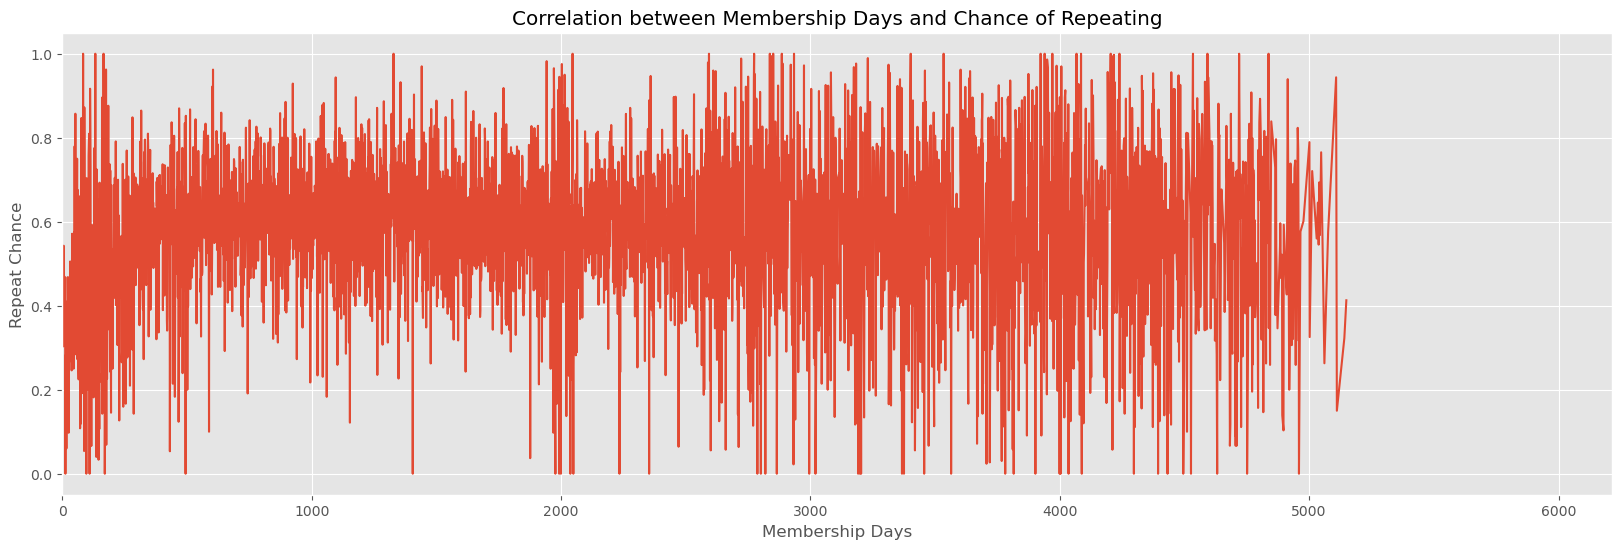

In [84]:
# Calculate membership days for train
train_cleaned['membership_days'] = (train_cleaned['expiration_date'] - train_cleaned['registration_init_time']).dt.days

# Group by membership days and calculate the mean of the target variable
membership_days_grouped = train_cleaned.groupby('membership_days')['target'].mean().reset_index()

# Plotting
plt.figure(figsize=(20, 6))
sns.lineplot(x='membership_days', y='target', data=membership_days_grouped)
plt.xlabel("Membership Days")
plt.ylabel("Repeat Chance")
plt.title("Correlation between Membership Days and Chance of Repeating")
plt.xlim(left=0)  # Set the lower limit of x-axis to 0
plt.show()

<div style="text-align:justify">
Looking into the relationship between 'expiration_date' with 'registration_init_time', we <b>conducted a new variable called "Membership days"</b>, calculated by dividing 'expiration_date' with 'registration_init_time'.
<br>
<br>
It can be observed that membership days range from 0 to around 5000 days. The correlation level is relatively moderate (0.5). As the membership duration increases, the chance of repeating also tends to increase, but it is accompanied by a higher level of violation.
<br>
<br>
We can observe <b>three main periods</b> that imply different insights:
<br>
&#8226; Membership duration from <b>0 - 300 days</b>: New users have an immediate need to listen to music on KKBOX and register as members to fulfill their music needs. The graph shows a clear increase in the mean, indicating a significant increase in the chance of repeating for members using the app within the first year.
<br>
&#8226; Membership duration from <b>300 to around 2000 days</b>: Users tend to listen and repeat less (lower violation).
<br>
&#8226; Membership duration from <b>around 2000 to 5000 days</b>: Users become loyal users, developing habits of listening to their favorite songs repeatedly as well as being open to exploring new songs (higher violation).

In [85]:
# Delete unecessary dataframe to free the memory storage
del membership_days_grouped

#### Registration pattern

In [86]:
members_df['registration_init_time'] = pd.to_datetime(members_df['registration_init_time'], format='%Y%m%d')

members_df['registration_year'] = members_df['registration_init_time'].dt.year

members_df = members_df[pd.to_numeric(members_df['registered_via'], errors='coerce').notnull()]

registration_counts = members_df.groupby('registration_year').size()

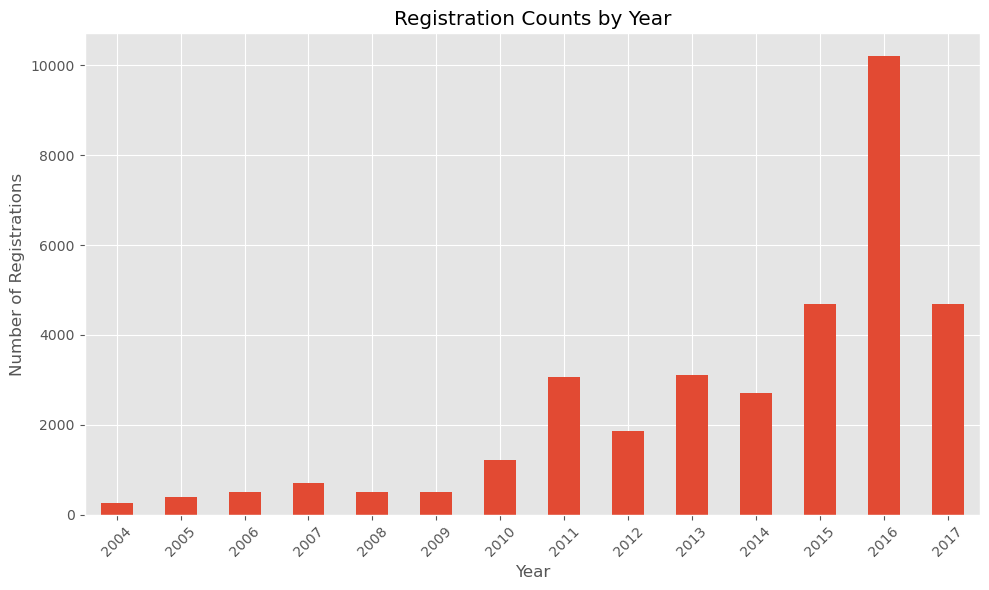

In [87]:
registration_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Registration Counts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


---


<div style="text-align:justify">
The graph depicting KKBOX's registration trends offers a fascinating glimpse into their journey during the dynamic early 2010s. By weaving together historical events, industry statistics, and educated guesses about missing data, we can illuminate the factors that likely influenced the number of users signing up for the service
<br>
<br>
<b>2009-2013:</b>  Riding the Mobile Wave to Registration Surge
<br>
The graph's sharp rise in registrations during this period aligns perfectly with the explosion of smartphones in Asia. Smartphone penetration in the region skyrocketed from 23% in 2009 to over 70% by 2013 (Pew Research Center, 2016) . This surge in mobile internet accessibility, with over 2.1 billion users by 2013 (Statista, 2014) , created a fertile ground for KKBOX's user-friendly app. It's worth noting that during this period, KKBOX might have enjoyed a dominant market share due to less competition from established international streaming services. While market expansion played a crucial role, KKBOX likely prioritized features that resonated with Asian users. For instance, incorporating karaoke mode, a beloved pastime in many Asian cultures, could have been a major differentiator (Ho, 2003).
<br>
<br>
<b>2014-2016:</b> The booming of the music streaming industry
<br>
This period 2014-2016 witnessed a significant growth of the music streaming industry. In 2014, a significant shift occurred in the global music industry. A decade or so since the launch of iTunes, the first digital music platform at scale, revenue from digital channels overtook that from physical channels (McKinsey, 2016). In 2015, digital channels accounted for 45 percent of the global music industry compared with 39 percent for physical channels. 2015 was also an explosive year for the industry due to the appearance of Apple Music, which clearly showed the potential growth of the whole music streaming industry. In 2016, a second significant shift is widely expected within the digital music industry, with streaming to overtake download revenue (McKinsey, 2016). Hence, not only KKBOX but also its competitors such as Spotify, Apple Music, etc. achieved marvelous results in this year. Specifically, as we can see that KKBOX hit the peak of registration of more than 10,000 . Furthermore, 2016 witnessed the highest number of registration thanks to its special collaboration with Facebook. In July 2016, KKBOX collaborated with Facebook to introduce "Music Stories", a feature allowing music sharing and listening directly on Facebook (KKBOX, 2016). This integration simplified music sharing for users and likely boosted KKBOX's visibility. Furthermore, 2016 witnessed the highest number of registration thanks to its special collaboration with Facebook.  In July 2016, <b>KKBOX collaborated with Facebook</b> to introduce <b>"Music Stories"</b>,  a feature allowing music sharing and listening directly on Facebook (KKBOX, 2016). This integration simplified music sharing for users and likely boosted KKBOX's visibility. Besides, in October 2016, KKBOX enhanced their free tier, offering access to over 30 million songs for a monthly fee. This move likely attracted users hesitant to commit to a paid subscription, leading to a wider user base.
<br>
<br>
<b>2016-2017:</b> A plunge to KKBOX
<br>
The significant drop of up to <b>45%</b> in 2017 of KKBOX, although 2017 was still in the period of extremely strong development of the music industry. This can be explained by the extensive competition from other giants, especially Spotify. Spotify's strategic focus on the Asian market, historically dominated by KKBOX, involved a multi-faceted approach aimed at tapping into the region's vast potential. Efforts to localize content played a crucial role, as Spotify curated playlists featuring popular regional artists and offered a diverse range of music genres such as K-pop, J-pop, and Mandopop (Datta et al., 2018). This platform also tailored its user experience with language support, localized interfaces, and culturally relevant features to better suit the needs of Asian listeners (Way et al., 2020).
<br>
<br>
Meanwhile, KKBOX faced increased competition as Spotify intensified its efforts in Asia. With Spotify's expansion, KKBOX sought to maintain its dominance by leveraging its established presence and deep-rooted understanding of local preferences. KKBOX continued to emphasize its strengths, such as its vast catalog of regional music and tailored user experience, to retain its user base. KKBOX also responded to challenges by enhancing its offerings, including collaborations with social media platforms like Facebook to simplify music sharing and boosting visibility (Walzer, 2024). However, despite these efforts, KKBOX experienced a decline in registrations.
</div>

#### Number of play and chance of repeating in each source system tab

In [88]:
system_repeat_chance = train_cleaned.groupby('source_system_tab')["target"].agg([count_target_1, 'count']).reset_index()
system_repeat_chance.columns = ['source_system_tab', 'number_of_repeat', 'number_of_play']
system_repeat_chance['chance_of_repeating'] = system_repeat_chance['number_of_repeat']/system_repeat_chance['number_of_play']

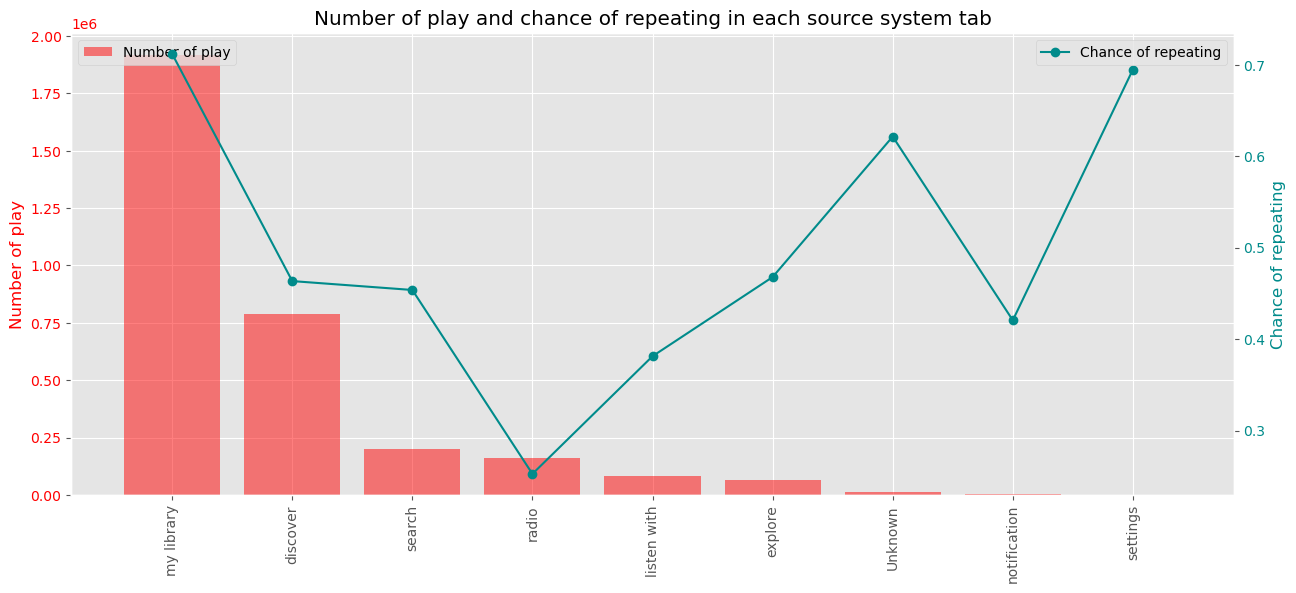

In [89]:
system_repeat_chance = system_repeat_chance.sort_values(by = 'number_of_play', ascending = False)
x = system_repeat_chance['source_system_tab']
y1 = system_repeat_chance['number_of_play']
y2 = system_repeat_chance['chance_of_repeating']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create first y-axis (left)
ax1.bar(x, y1, color='red', alpha=0.5, label='Number of play')
plt.xticks(rotation=90)
ax1.set_ylabel('Number of play', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')

# Create second y-axis (right)
ax2 = ax1.twinx()
ax2.plot(x, y2, color='darkcyan', marker='o', label='Chance of repeating')
plt.xticks(rotation=90)
ax2.set_ylabel('Chance of repeating', color='darkcyan')
ax2.tick_params(axis='y', labelcolor='darkcyan')
ax2.legend(loc='upper right')

ax2.grid(False)
# Show plot
plt.title('Number of play and chance of repeating in each source system tab')
plt.show()

<div style="text-align:justify">
Among source system tabs, my library tab has the highest number of play and also the highest chance of repeating of more than 0.7. This shows that users of KKBox music trust in their preference and usually replay their favorite songs that were saved in My Library tab.
<br>
<br>
Furthermore, the "Discovery" tab, despite experiencing the second-highest number of plays, has a chance of repeat lower than 0.5. This suggests that users are open to discovering new songs, but sometimes these songs may not align with their preferences, leading to a lower likelihood of recurrence in the future.
</div>

#### Number of play and chance of repeating in each screen layout

In [90]:
screen_repeat_chance = train_cleaned.groupby('source_screen_name')["target"].agg([count_target_1, 'count']).reset_index()
screen_repeat_chance.columns = ['source_screen_name', 'number_of_repeat', 'number_of_play']
screen_repeat_chance['chance_of_repeating'] = screen_repeat_chance['number_of_repeat']/screen_repeat_chance['number_of_play']

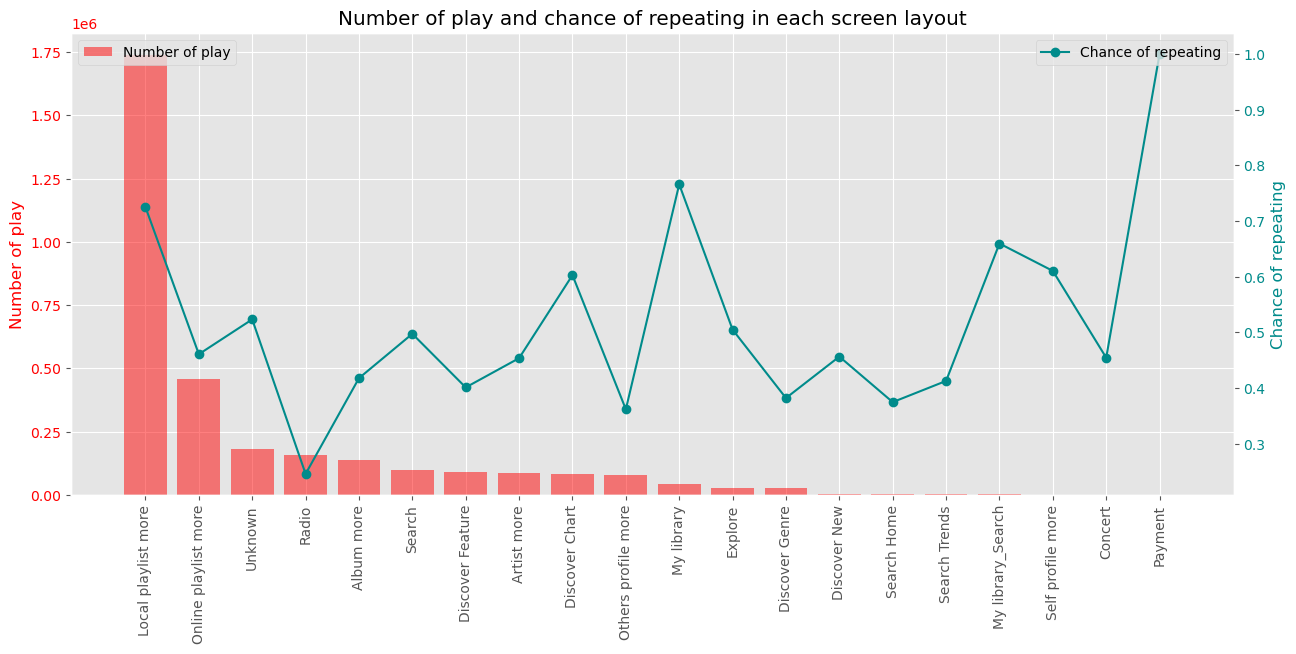

In [91]:
screen_repeat_chance = screen_repeat_chance.sort_values(by = 'number_of_play', ascending = False)
x = screen_repeat_chance['source_screen_name']
y1 = screen_repeat_chance['number_of_play']
y2 = screen_repeat_chance['chance_of_repeating']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create first y-axis (left)
ax1.bar(x, y1, color='red', alpha=0.5, label='Number of play')
plt.xticks(rotation=90)
ax1.set_ylabel('Number of play', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')

# Create second y-axis (right)
ax2 = ax1.twinx()

ax2.plot(x, y2, color='darkcyan', marker='o', label='Chance of repeating')
plt.xticks(rotation=90)
ax2.set_ylabel('Chance of repeating', color='darkcyan')
ax2.tick_params(axis='y', labelcolor='darkcyan')
ax2.legend(loc='upper right')

ax2.grid(False)
# Show plot
plt.title('Number of play and chance of repeating in each screen layout')
plt.show()

<div style="text-align:justify">
The observation suggests a correlation between certain screen names or features and the source system tab. Specifically, the 'local playlist more' screen or feature appears to be closely associated with the 'My library' source system tab. This association is indicated by the high number of plays observed for local playlists, which are typically stored or accessed within a user's personal library.
<br>
<br>
On the other hand, the 'online playlist more' screen or feature appears to be linked with the 'Discovery' tab of the source system. Despite experiencing a high number of plays, online playlists exhibit a lower chance of repeating compared to local playlists. This implies that users are more likely to explore and listen to new songs through online playlists, as they are dynamically curated and may introduce users to a wider variety of music. However, the lower chance of repeating suggests that users may not find as many songs in online playlists that align closely with their preferences, leading to fewer repeated listens compared to songs saved in their personal libraries.
</div>

#### Number of play and chance of repeating in each source type

In [92]:
type_repeat_chance = train_cleaned.groupby('source_type')["target"].agg([count_target_1, 'count']).reset_index()
type_repeat_chance.columns = ['source_type', 'number_of_repeat', 'number_of_play']
type_repeat_chance['chance_of_repeating'] = type_repeat_chance['number_of_repeat']/type_repeat_chance['number_of_play']

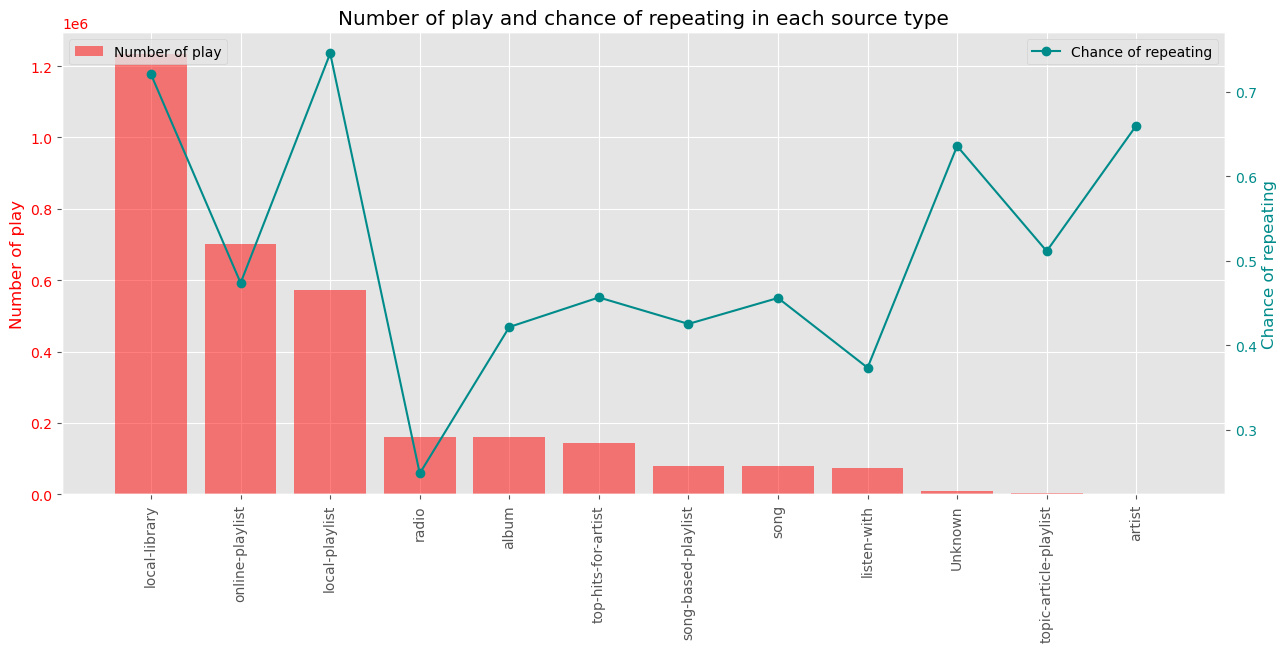

In [93]:
type_repeat_chance = type_repeat_chance.sort_values(by = 'number_of_play', ascending = False)
x = type_repeat_chance['source_type']
y1 = type_repeat_chance['number_of_play']
y2 = type_repeat_chance['chance_of_repeating']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create first y-axis (left)
ax1.bar(x, y1, color='red', alpha=0.5, label='Number of play')
plt.xticks(rotation=90)

ax1.set_ylabel('Number of play', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')

# Create second y-axis (right)
ax2 = ax1.twinx()

ax2.plot(x, y2, color='darkcyan', marker='o', label='Chance of repeating')
plt.xticks(rotation=90)
ax2.set_ylabel('Chance of repeating', color='darkcyan')
ax2.tick_params(axis='y', labelcolor='darkcyan')
ax2.legend(loc='upper right')

ax2.grid(False)
# Show plot
plt.title('Number of play and chance of repeating in each source type')
plt.show()

<div style="text-align:justify">
Source type is the entry point a user first plays music on mobile apps. Different source types often indicate distinct user behaviors and intentions. For example, a user who starts playing a song from an "Online playlist" may be in a discovery mode, exploring new music, while someone who plays a song from "My library" might be revisiting their favorite tracks.
<br>
<br>
 When analyzing the source types for predicting song recurrence, it's evident that certain source types exhibit distinct characteristics. Interestingly, the "Local playlist" and "My library" source types stand out as having the highest chance of repeating songs, indicating a strong sense of <b>user loyalty and preference for saved or locally stored content</b>. Additionally, it's noteworthy that the "Local playlist" source type also records the highest number of plays, suggesting a significant level of user engagement with this feature. This dual observation highlights the importance of personalized and locally curated content to users, as well as the propensity for repeated enjoyment of songs within these playlists and libraries.

In [94]:
# Delete unecessary dataframe to free the memory storage
del system_repeat_chance, screen_repeat_chance, type_repeat_chance, x, y1, y2

## **IV. Music Recommendations System**

In [95]:
# Delete unecessary dataframe to free the memory storage
del train_df, test_df, songs_df, song_extra_df, members_df

### **4.1. Features engineering**

<div style="text-align:justify">
The table below summarizes the additional features that we have extracted from the original columns in order to capture <b>as much information as possible</b>.
</div>

Attributes | Data Type<br>(original) | Reasons to extract | Features extracted
-----------|-----------|------------------|----------------
lyricist | object | Some values are combined by many other unique values with a "\|", sometimes with "/" or even "\\\\" | Split to 4 columns: 3 first lyricist and number of lyricists
composer | object | Some values are combined by many other unique values with a "\|", sometimes with "/" or even "\\\\"  | Split to 4 columns: 3 first composers and number of composers
genre_ids | object | Some values are combined by many other unique values with a "\|", sometimes with "/" or even "\\\\"  | Split to 4 columns: 3 first genres and number of genres
artist_name | object | Some values are combined by many other unique values with "\|", "&", "feat." "+", "featuring", "and", "with" and "vs"  | Split to 4 columns: 3 first artist names and number of artist names
isrc | object | The codes itself offer no valuable information | Extract releasing year & country code
registration_init_time | int64 | Each member has their unique registration date so there is no pattern captured | Extract to membership days
expiration_date	 | int64 | Each member has their unique expiration date so there is no pattern captured| Extract to membership days

#### Lyricist, composer, genre_ids and artist_name

<div style="text-align:justify">
We noticed there some strange types of values in genres, composer, lyricist and artist name. Some values in genres, composer, lyricist are combined by many other unique values with a "|", sometimes with "/" or even "\\\\", ";". On the other hand, artist name have some values that is a combination of different featuring artists, with "|", "&", "feat." "+", "featuring", "and", "with" and "vs". For example some of the lyricist values look like this:
</div>

In [ ]:
list(train_cleaned["lyricist"].unique())[-10:]

['Albert Hammond| Michael Hazelwood',
 'Joseph Langridge-Brown|Julian Emery|Dominic Craik|Conor Mason|Jim Irvin',
 'Kalimba Marichal',
 'Nik Karpen; Andrew Schubert; Chris Lord-Alge; Rob Cavallo; Keith Armstrong; Aaron Walk; Steve Rea; Russ Waugh; Doug McKean; Brad Townsend; Lars Fox; Dan Chase',
 'Runjie Liu',
 'Julian Casablancas',
 'Louis Lo',
 'Tyshan Knight',
 'Hyo-Je Kim',
 'Miryam Latrece']

<div style="text-align:justify">
Since each combinations will be treated differently in the model even when they have some components in common, we will split these columns into four columns with the aim to capture as much information as possible. The first three added columns will contains the first three gernes/composers/lyricists/artist names, and the fourth added column will be the number of gernes/composers/lyricists/artist names.
<br>
<br>
The original columns that contains mixing gernes/composers/lyricists/artist names now are of little value, so we will delete them.
</div>

In [ ]:
def split_component(df, column_name):
  df[f"Num_of_{column_name}"] = np.nan
  df[f"First_{column_name}"] = np.nan
  df[f"Second_{column_name}"] = np.nan
  df[f"Third_{column_name}"] = np.nan
  for index, row in df.iterrows():
      if row[column_name] == "Unknown":
        df.at[index, f"Num_of_{column_name}"] = 0
        df.at[index, f"First_{column_name}"] = "None"
        df.at[index, f"Second_{column_name}"] = "None"
        df.at[index, f"Third_{column_name}"] = "None"
        continue
      list_comp = row[column_name].replace(';', "|").replace("/", "|").replace("\\", "|").split("|")
      df.at[index, f"Num_of_{column_name}"] = len(list_comp)
      df.at[index, f"First_{column_name}"] = list_comp[0].strip()
      try:
        df.at[index, f"Second_{column_name}"] = list_comp[1].strip()
      except IndexError:
        df.at[index, f"Second_{column_name}"] = "None"
      try:
        df.at[index, f"Third_{column_name}"] = list_comp[2].strip()
      except IndexError:
        df.at[index, f"Third_{column_name}"] = "None"
  print(f"Done {column_name}")

def split_artist_name(df, column_name):
  df[f"Num_of_{column_name}"] = np.nan
  df[f"First_{column_name}"] = np.nan
  df[f"Second_{column_name}"] = np.nan
  df[f"Third_{column_name}"] = np.nan
  for index, row in df.iterrows():
      if row[column_name] == "Unknown":
        df.at[index, f"Num_of_{column_name}"] = 0
        df.at[index, f"First_{column_name}"] = "None"
        df.at[index, f"Second_{column_name}"] = "None"
        df.at[index, f"Third_{column_name}"] = "None"
        continue
      if row[column_name] == "Various Artists":
        df.at[index, f"Num_of_{column_name}"] = -1
        df.at[index, f"First_{column_name}"] = "Various Artists"
        df.at[index, f"Second_{column_name}"] = "Various Artists"
        df.at[index, f"Third_{column_name}"] = "Various Artists"
        continue
      list_comp = row[column_name].replace('&', "|").replace("feat.", "|").replace("+", "|").replace("featuring", "|").replace("and", "|").replace("with", "|").replace("vs", "|").split("|")
      df.at[index, f"Num_of_{column_name}"] = len(list_comp)
      df.at[index, f"First_{column_name}"] = list_comp[0].strip()
      try:
        df.at[index, f"Second_{column_name}"] = list_comp[1].strip()
      except IndexError:
        df.at[index, f"Second_{column_name}"] = "None"
      try:
        df.at[index, f"Third_{column_name}"] = list_comp[2].strip()
      except IndexError:
        df.at[index, f"Third_{column_name}"] = "None"
  print(f"Done {column_name}")

In [ ]:
split_component(train_cleaned, "genre_ids")
split_component(train_cleaned, "composer")
split_component(train_cleaned, "lyricist")
split_artist_name(train_cleaned, "artist_name")

Done genre_ids
Done composer
Done lyricist
Done artist_name


In [ ]:
split_component(test_cleaned, "genre_ids")
split_component(test_cleaned, "composer")
split_component(test_cleaned, "lyricist")
split_artist_name(test_cleaned, "artist_name")

Done genre_ids
Done composer
Done lyricist
Done artist_name


In [ ]:
train_cleaned.drop(columns = ["genre_ids", "composer", "lyricist", "artist_name"], inplace = True)
test_cleaned.drop(columns = ["genre_ids", "composer", "lyricist", "artist_name"], inplace = True)

#### isrc

<div style="text-align:justify">
As the codes itself offer no valuable information, we will extract releasing year and country code from these isrc codes. The country code in training set have already extracted when we retrieve Top 5 countries have most played song in the Explonatory Data Analysis.
</div>

In [ ]:
def isrc_to_year(isrc):
    if isrc != "Unknown":
        if int(isrc[5:7]) > 17:
            return 1900 + int(isrc[5:7])
        else:
            return 2000 + int(isrc[5:7])
    else:
        return -1

In [ ]:
train_cleaned['release_year'] = train_cleaned['isrc'].apply(isrc_to_year)
test_cleaned['release_year'] = test_cleaned['isrc'].apply(isrc_to_year)
test_cleaned['country_code'] = test_cleaned['isrc'].apply(isrc_to_country)

In [ ]:
train_cleaned.drop(columns="isrc", inplace = True)
test_cleaned.drop(columns="isrc", inplace = True)

#### registration_init_time and expiration_date

<div style="text-align:justify">
As each member has a unique registration date, so it is very unlikely that there is any pattern to be captured if we treat these dates seperately. We think membership days will display pattern among users better.
</div>

In [ ]:
train_cleaned['membership_days'] = (train_cleaned['expiration_date'] - train_cleaned['registration_init_time']).dt.days
test_cleaned['membership_days'] = (test_cleaned['expiration_date'] - test_cleaned['registration_init_time']).dt.days

In [ ]:
train_cleaned.drop(columns = ["registration_init_time", "expiration_date"], inplace = True)
test_cleaned.drop(columns = ["registration_init_time", "expiration_date"], inplace = True)

### **4.2. Data preprocessing**

In [ ]:
# Convert to categorical type
for col in train_cleaned.select_dtypes(include="O").columns:
    train_cleaned[col] = train_cleaned[col].astype('category')
    test_cleaned[col] = test_cleaned[col].astype('category')

In [ ]:
# Encoding categorical features
encoder = LabelEncoder()
for col in train_cleaned.select_dtypes(include=['category']).columns:
    train_cleaned[col] = encoder.fit_transform(train_cleaned[col])
    test_cleaned[col] = encoder.fit_transform(test_cleaned[col])

In [ ]:
# Convert language, releasing year and target to int type
train_cleaned["language"] = train_cleaned["language"].astype(int)
train_cleaned["release_year"] = train_cleaned["release_year"].astype(int)
train_cleaned["target"] = train_cleaned["target"].astype(int)
test_cleaned["language"] = test_cleaned["language"].astype(int)
test_cleaned["release_year"] = test_cleaned["release_year"].astype(int)

In [ ]:
X = train_cleaned.drop(columns = ["song_id", "target", "msno"])
y = train_cleaned["target"]

In [ ]:
# Check X and y shape
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (3221240, 29)
y shape: (3221240,)


In [ ]:
# Split 70% data for training set, 30% data for testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1502)

In [ ]:
del train_cleaned

### **4.3. Recommendation Models**

#### 4.3.1. Logistic Regression

<div style="text-align:justify"> <b> Logistic Regression is a statistical approach and a Machine Learning algorithm that is used for classification problems and is based on the concept of probability</b>. It is used when the dependent variable (target) is categorical. Its main characteristic lies in its ability to model the probability of a certain class or event occurrence based on input features. In the context of this project, <b>Logistic Regression can be utilized to predict whether a user will like or dislike a particular song or genre</b> (through observing the target variable: target = 1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise) <b>based on features such as past listening history, genre preferences, and user demographics.</b>
</div>


In [ ]:
# Define Logistic Regression model
logModel = LogisticRegression()

# Define search space
space = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [100, 10, 1.0, 0.1, 0.01]
}

# Define RandomizedSearchCV
search = RandomizedSearchCV(logModel, space,  n_iter=20, cv=3, n_jobs=-1)

# Execute search
result = search.fit(X_train, y_train)

# Summarize result
print('Best Score:', result.best_score_)
print('Best Hyperparameters:', result.best_params_)

Best Score: 0.6214142025975904
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}


In [ ]:
# Use the best estimator found by randomized search for prediction
best_logreg = search.best_estimator_
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", logreg_acc)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6215142822846689
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.17      0.27    387360
           1       0.62      0.92      0.74    579012

    accuracy                           0.62    966372
   macro avg       0.61      0.55      0.51    966372
weighted avg       0.61      0.62      0.55    966372



<div style="text-align:justify"> Initially, a logistic regression model was established, followed by the specification of a search space encompassing various solver types ('newton-cg', 'lbfgs', 'liblinear'), penalty types ('l1', 'l2'), and regularization strength parameters (C) with diverse values. Using RandomizedSearchCV, the model explored the parameter space through randomized sampling and evaluated performance with three-fold cross-validation. This iterative process led to the selection of hyperparameters maximizing the model's accuracy of 62%.
</div>

#### 4.3.2. Decision Trees

<div style="text-align:justify">Decision Trees are well-suited for building a music recommendation system due to their ability to handle both numerical and categorical data, making them effective for processing features. Their main characteristic lies in their ability to recursively partition the feature space based on the most informative features, creating a hierarchy of decision rules that ultimately lead to classification outcomes. In the context of music recommendation, Decision Trees can capture complex interactions between features and user preferences, enabling the system to make intuitive and interpretable recommendations. Additionally, Decision Trees can handle nonlinear relationships between features and the target variable, allowing for more accurate predictions of whether there will be recurring listening events of a user toward a particular song or genre.
</div>

In [ ]:
# Define the parameter distribution
param_dist = {
    'max_depth': [None] + list(np.arange(5, 21, 5)),
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameters tuning
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 20}


In [ ]:
# Use the best estimator found by randomized search for prediction
best_decision_tree = random_search.best_estimator_
best_decision_tree.fit(X_train, y_train)
test_prediction = best_decision_tree.predict(X_test)
decisionTree_acc = accuracy_score(y_test, test_prediction)
print("Accuracy:", decisionTree_acc)
print("Classification Report:\n", classification_report(y_test, test_prediction))

Accuracy: 0.6994511430380848
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.52      0.58    387360
           1       0.72      0.82      0.77    579012

    accuracy                           0.70    966372
   macro avg       0.69      0.67      0.67    966372
weighted avg       0.69      0.70      0.69    966372



<div style="text-align:justify">
This method involved exploring a predefined search space by randomly sampling from it to identify the optimal combination of hyperparameters. The search yielded the optimal parameters {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 20}. Upon application of these parameters, the classifier achieved an accuracy of 0.6995 on the test dataset.
</div>

#### 4.3.3. Naive Bayes

<div style="text-align:justify"> Naive Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. Despite their "naive" assumption of feature independence, Naive Bayes models can still perform well in practice, especially when dealing with categorical features. In this project, by estimating the probability of a user recurring listening event toward a song or genre based on past listening history and other relevant features, Naive Bayes classifiers can provide quick and effective recommendations. Additionally, they require relatively little training data and are robust to noise, making them practical for real-world applications where user preferences may vary widely.
</div>

In [ ]:
# Define Gaussian Naive Bayes model
gauNB = GaussianNB()

# Define hyperparameters to tune
param_dist = {
    'var_smoothing': [1e-6, 1e-5, 1e-4]
}

# Hyperparameters tuning with RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gauNB,
    param_distributions=param_dist,
    n_iter=20,  # Adjust the number of iterations as needed
    cv=3, n_jobs=-1       # Adjust the number of folds as needed
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'var_smoothing': 0.0001}
Best score: 0.6008435970984071


In [ ]:
# Use the best estimator found by random search for prediction
best_gauNB = random_search.best_estimator_
test_prediction = best_gauNB.predict(X_test)
gauNB_acc = accuracy_score(y_test, test_prediction)
print("Accuracy:", gauNB_acc)
print("Classification Report:\n", classification_report(y_test, test_prediction))

Accuracy: 0.6013564134722447
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.07      0.12    387360
           1       0.61      0.96      0.74    579012

    accuracy                           0.60    966372
   macro avg       0.56      0.51      0.43    966372
weighted avg       0.57      0.60      0.49    966372



<div style="text-align:justify">
Through randomized search, a predefined search space was explored to identify the optimal hyperparameters. The search yielded the best parameter {'var_smoothing': 0.0001} along with a corresponding best score of 0.6008. Upon applying these optimized parameters, the classifier achieved an accuracy of 0.6014 on the test dataset.
</div>

#### 4.3.4. Random Forest

<div style="text-align:justify">
Random Forests are highly suitable for building such a music recommendation system due to their ability to handle both numerical and categorical features effectively. One of their main characteristics is ensemble learning, where multiple decision trees are trained independently and then combined to make predictions. In the context of music recommendation, this allows Random Forests to capture complex relationships between various features such as past listening history, genre preferences, and user demographics. Moreover, Random Forests are robust to overfitting and noisy data, providing reliable recommendations even in the presence of incomplete or imperfect information. Their flexibility and scalability make them well-suited for large-scale recommendation systems where performance and accuracy are crucial.
</div>

In [ ]:
randomForest = RandomForestClassifier(bootstrap = True,
    max_depth= 15,
    max_features= 3,
    min_samples_leaf= 2,
    min_samples_split= 2,
    n_estimators= 1000)
randomForest.fit(X_train, y_train)
test_prediction = randomForest.predict(X_test)
randomForest_acc = accuracy_score(y_test,test_prediction)
print("Accuracy : ", randomForest_acc)
print("Classification Report:\n",classification_report(y_test, test_prediction))

Accuracy :  0.695602728555877
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.52      0.58    387360
           1       0.72      0.81      0.76    579012

    accuracy                           0.70    966372
   macro avg       0.68      0.67      0.67    966372
weighted avg       0.69      0.70      0.69    966372



<div style="text-align:justify">
Hyperparameter tuning via RandomizedSearchCV was not conducted for the Random Forest classifier due to the dataset's large size, which would have demanded significant computational resources and time. Nevertheless, the model achieved an accuracy of approximately 69.56%, indicating its effectiveness in predicting the target variable. The model's specificity stands at 0.65, indicating that 65% of instances classified as class 0 were accurately predicted. On the other hand, with a sensitivity of 0.72, the model accurately identified 72% of instances belonging to class 1. However, these are only the results without utilizing hyperparameter tuning, as there is room for improvement in both accuracy and precision metrics for class 0 and class 1.
</div>

### **4.6. Model Comparisons**

In [ ]:
rows = [
    ["Logistic Regression",logreg_acc],
    ["Decision Trees",decisionTree_acc],
    ["RandomForest",randomForest_acc],
    ["Naive Bayes",gauNB_acc]
    ]
results = pd.DataFrame(rows,
                       columns = ["Model","Test Evaluation %"]).sort_values(
                        by="Test Evaluation %",ascending=False)
results.style.background_gradient(cmap='Set3')

,Model,Test Evaluation %
1,Decision Trees,0.699451
2,RandomForest,0.695603
0,Logistic Regression,0.621514
3,Naive Bayes,0.601356


<div style="text-align:justify">
Decision Trees and Random Forest are the top-performing models in this evaluation. The Decision Trees model achieved the highest test evaluation percentage at 0.699451, followed closely by Random Forest at 0.695603, slightly edging out Random Forest. Both of these models are tree-based algorithms known for their simplicity and effectiveness in various tasks. Logistic Regression and Naive Bayes are ranked lower, with test evaluation percentages of 0.621514 and 0.601356, respectively.
<br>
<br>
Given these results, Decision Trees and Random Forest emerge as strong contenders, with the former prioritizing interpretability and the latter emphasizing generalization. Meanwhile, Logistic Regression and Naive Bayes albeit potentially sacrificing performance in more complex datasets and show their limitations in capturing intricate relationships within the dataset.
</div>

### **4.7. Most important features**

In [ ]:
#Feature importances
feature_scores = pd.Series(best_decision_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)

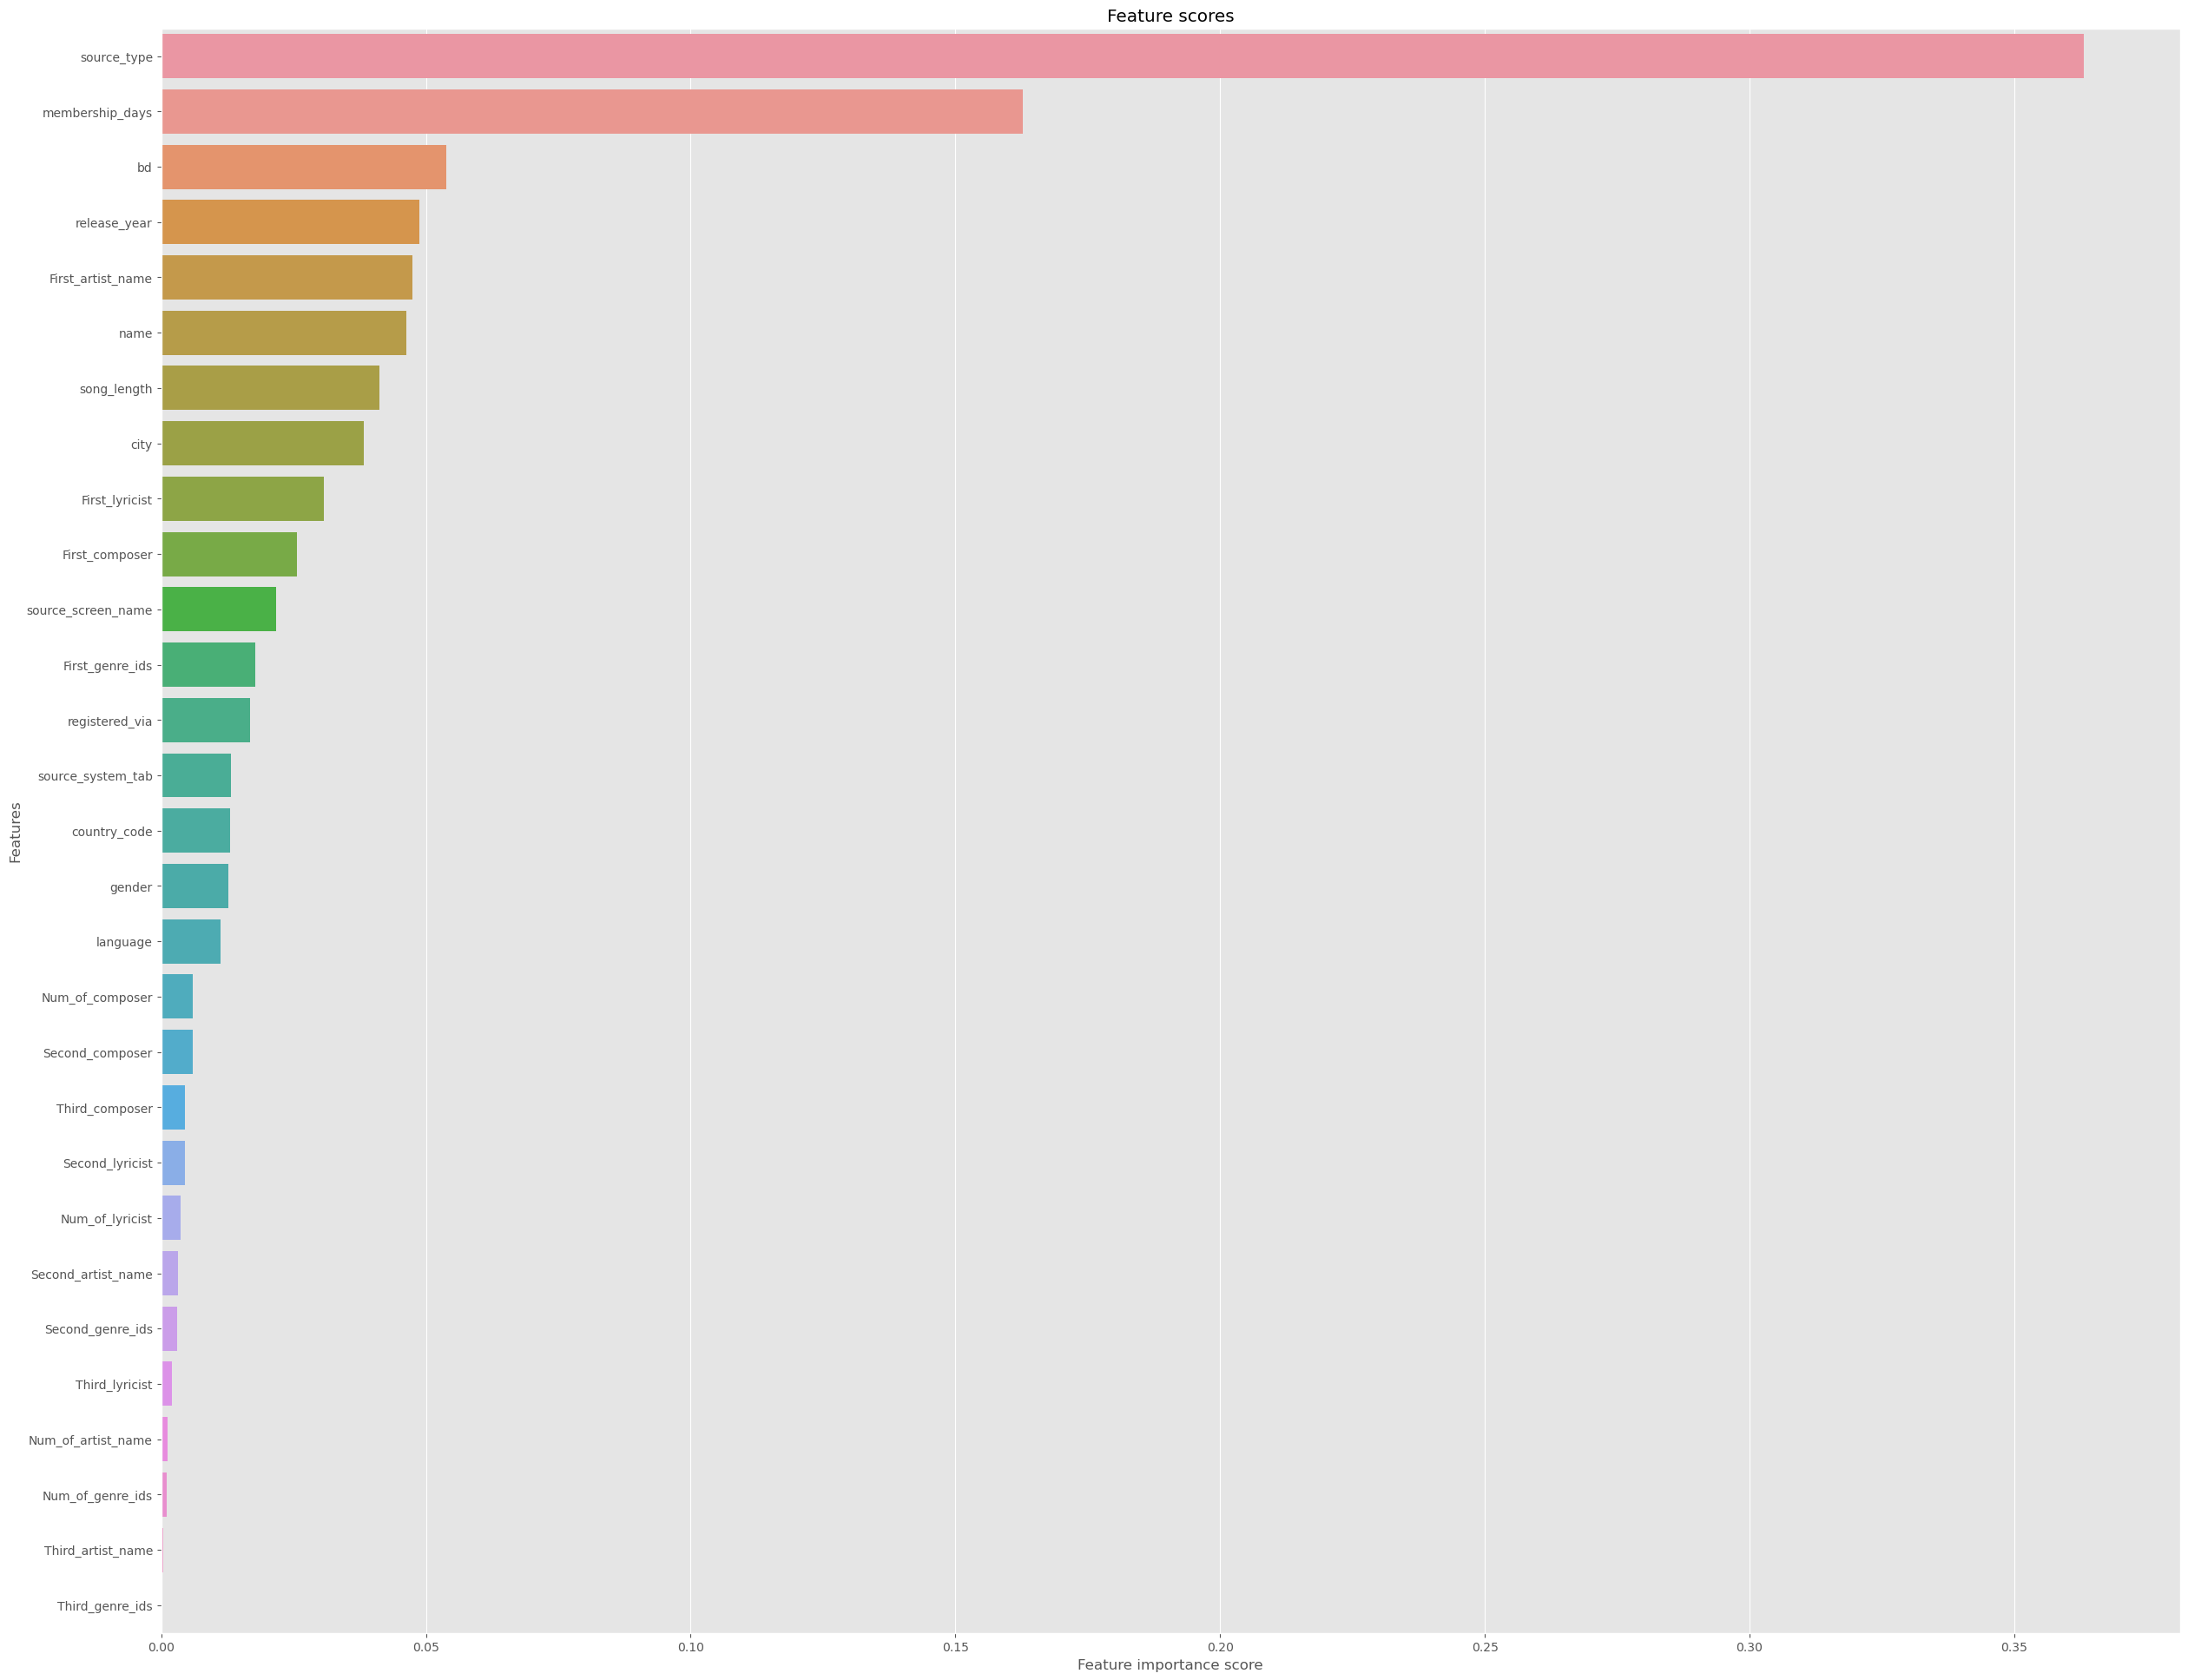

In [ ]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Feature scores")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

<Axes: >

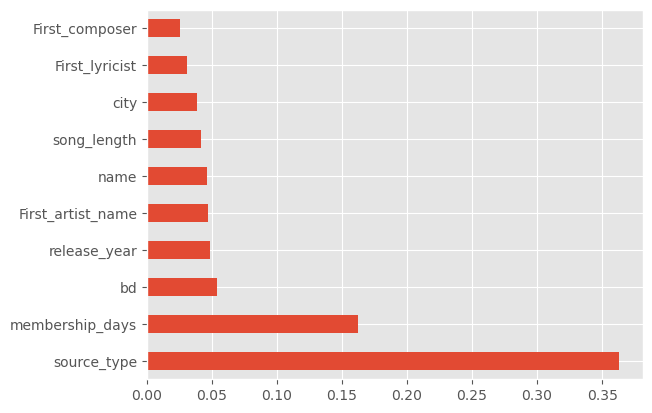

In [ ]:
feature_scores.nlargest(10).plot(kind='barh')

<div style="text-align:justify">
The important features here are source_type, membership_days, and birthday.
<br>
<br>
The results of source_types are consistent with the analysis above as it represents the final step before a music track is replayed. Following this step, the track is played, contributing to the chance of repeating. The source type holds significant importance when predicting the likelihood of song recurrence in the future due to its role as the last interactive point with the user before songs are played. As the entry point for music playback on mobile apps, the source type reflects the user's decision-making process and preferences regarding the selection of songs. Since it represents a collection of songs curated by the platform or chosen by the user, it provides valuable insights into the user's music consumption behavior and interests. By understanding which source types are associated with higher or lower recurrence rates, we can infer the impact of different music discovery methods, such as online playlists, radio, or personalized recommendations, on user engagement and satisfaction.
<br>
<br>
Although "membership_days'' may not initially be considered a significant factor in predicting repeat listening patterns, its placement as the second most important factor suggests its potential. This opens up a new avenue for further research into the role of "membership_days" in the context of annual registration numbers for predicting repeat listening patterns.
<br>
<br>
The "bd" variable, representing age groups, emerges as the third most important factor in predicting the target variable. Age is a significant predictor of repeating behaviors due to its correlation with lifestyle factors, music preferences, and familiarity with technology. Additionally, age reflects life stages and transitions, impacting music consumption habits and engagement with streaming services.
</div>

### **4.8. Predictions for the provided testing set**

In [ ]:
X_test_provided = test_cleaned.drop(columns = ['id', 'msno','song_id'])
new_order = list(X_train.columns)
X_test_provided = X_test_provided[new_order]
submission = pd.DataFrame(test_cleaned['id'])
test_provided_predictions = best_decision_tree.predict(X_test_provided)
submission['target'] = test_provided_predictions
submission.to_csv("submission.csv", index = False)

<div style="text-align:justify">
The target variable in the provided test file will be predicted by the model with the highest accuracy score, which happens to be the Decision Tree model. These predictions are submitted in the accompanying CSV file named "submission.csv", comprising two columns: 'id' and 'target'.
</div>

## **V. Conclusions**

<div style="text-align:justify">
In conclusion, our KKBOX music recommendation project has delivered promising results, achieving a model accuracy of 69.95%. We attained this outstanding outcome through careful analysis at each step of the process.
<br>
<br>
Throughout our endeavor, we meticulously cleaned the merged dataframes, paying special attention to handling missing categorical data. Rather than deleting missing values outright, we opted to fill them with "Unknown" or "Others" to ensure our model receives comprehensive information for prediction, especially considering the constraints of the testing set. 
Extensive exploratory data analysis (EDA) allowed us to uncover significant relationships and insights, leading to the identification of key features influencing our recommendation system's effectiveness. 
Features engineering played a vital role in enhancing our model's predictive capabilities, with attributes like lyricist, composer, genre_ids, artist_name, and isrc being carefully extracted and processed.
<br>
<br>
Our KKBOX music recommendation project has delivered promising results, achieving a model accuracy of 69.95%.
<br>
<br>
Notably, source_type emerged as a crucial determinant, highlighting the significance of understanding users' initial interactions with the platform for tailored recommendations. Our dataset exhibited balance, with a mean target variable close to 0.5, allowing us to focus on model accuracy as the primary evaluation metric. We conducted feature engineering to extract valuable attributes such as lyricists, composers, genres, artist names, release years, and membership duration from the original dataset. Among these features, source_type emerged as a crucial factor, reflecting users' initial interactions with the platform and influencing their music playback decisions. Membership_days and birthday also played pivotal roles, highlighting the importance of user engagement and demographic factors in predicting repeat listening patterns.
<br>
<br>
By leveraging these insights and employing robust modeling techniques, we aim to continue refining our recommendation system to deliver even more personalized and engaging music experiences for KKBOX users.
</div>

## **VI. References**

1. Age range by generation. Beresford Research. (2024, February 29). https://beresfordresearch.com/age-range-by-generation/    
2. Bayus, B. (1987). Forecasting sales of new contingent products: An application to the compact disc market. Journal of Product Innovation Management, 4(4), 243–255. https://doi.org/10.1016/0737-6782(87)90028-2 
3. Collie, N., & Wilson‐Barnao, C. (2020). Playing with TikTok: algorithmic culture and the future of creative work. In Edward Elgar Publishing eBooks. https://doi.org/10.4337/9781839101106.00020 
4. Conrad, F. G., Corey, J., Goldstein, S. H., Ostrow, J., & Sadowsky, M. (2018). Extreme re-listening: Songs people love . . . and continue to love. Psychology of Music, 47(2), 158–172. https://doi.org/10.1177/0305735617751050 
5. Datta, H., Knox, G., & Bronnenberg, B. J. (2018). Changing Their Tune: How Consumers’ Adoption of Online Streaming Affects Music Consumption and Discovery. Marketing Science, 37(1), 5–21. https://doi.org/10.1287/mksc.2017.1051 
6. Datta, H., Knox, G., & Bronnenberg, B. J. (2018). Changing Their Tune: How Consumers’ Adoption of Online Streaming Affects Music Consumption and Discovery. Marketing Science, 37(1), 5–21. https://doi.org/10.1287/mksc.2017.1051  
7. Drott, E. (2018). Why the Next Song Matters: Streaming, Recommendation, Scarcity. Twentieth-Century Music, 15(3), 325–357. https://doi.org/10.1017/s1478572218000245 
8. Evolution in Music Listening Behavior - KKBOX revealed four major trends identified by Big Data Analytics - KKBOX. (2017). KKBOX. https://www.kkbox.com/about/sg/zh-cn/news/detail/2223 
9. Feßl, B., & Hoi, H. (2000). Song complexity and song structure in the Moustached Warbler Acrocephalus melanopogon. Journal of Avian Biology, 31(2), 144–150. https://doi.org/10.1034/j.1600-048x.2000.310206.x 
10. Frenneaux, R., & Bennett, A. (2021). A new paradigm of engagement for the socially distanced artist. Rock Music Studies, 8(1), 65–75. https://doi.org/10.1080/19401159.2020.1852770 
11. Guo, C., Yang, Z., & Zhao, S. (2023). The impact of interactivity on live e-commerce platform on the intention of generation Z ’s consumption behavior. Lecture Notes in Education Psychology and Public Media, 3(1), 256–266. https://doi.org/10.54254/2753-7048/3/2022548    
12. Hellinga, L. (2014). Press and text in the first decades of printing. In BRILL eBooks (pp. 8–36). https://doi.org/10.1163/9789004279001_003 
13. Ho, W. (2003). Between globalisation and localisation: a study of Hong Kong popular music. Popular Music, 22(2), 143–157. https://doi.org/10.1017/s026114300300309x  
14. Ho, W.-C. (2013). Globalisation and localisation in music education in Hong Kong and Taiwan. Comparative Education, 49(2), 163–180. https://doi.org/10.1080/03050068.2012.686678  
15. How KKBOX hit $26.4M revenue and 10M customers in 2023. (2023). LATKA. https://getlatka.com/companies/kkbox 
16. iKala Cloud - 亞洲最創新的雲端 AI 科技夥伴. (2023, April 6). KKBOX - iKala Cloud. iKala Cloud -. https://ikala.cloud/en/cases/kkbox/#:~:text=KKBOX%20holds%2060%25%20market%20share,has%20exceeded%2040%20million%20tracks  . 
17. Im, H., Song, H., & Jung, J. (2018). A survival analysis of songs on digital music platform. Telematics and Informatics, 35(6), 1675–1686. https://doi.org/10.1016/j.tele.2018.04.013 
18. Interiano, M., Kazemi, K., Wang, L., Yang, J., Yu, Z., & Komarova, N. L. (2018). Musical trends and predictability of success in contemporary songs in and out of the top charts. Royal Society Open Science, 5(5), 171274. https://doi.org/10.1098/rsos.171274 
19. Interiano, M., Kazemi, K., Wang, L., Yang, J., Yu, Z., & Komarova, N. L. (2018b). Musical trends and predictability of success in contemporary songs in and out of the top charts. Royal Society Open Science, 5(5), 171274. https://doi.org/10.1098/rsos.171274 
20. Jenkins, R. V. (1987). Words, Images, Artifacts and Sound: documents for the history of technology. The British Journal for the History of Science, 20(1), 39–56. https://doi.org/10.1017/s0007087400000480 
21. Juslin, P., & Västfjäll, D. (2008). Emotional responses to music: The need to consider underlying mechanisms. Behavioral and Brain Sciences, 31(5), 559–575. https://doi.org/10.1017/s0140525x08005293 
22. Killin, A. (2018). The origins of music. Music & Science, 1, 205920431775197. https://doi.org/10.1177/2059204317751971 
23. KKBOX - LISTEN, AND BE HEARD. (2024). KKBOX. Retrieved March 24, 2024, from https://www.kkbox.com/my/en/ 
24. KKBOX、Facebook上で音楽をシェア・試聴できる機能「ミュージックストーリー(Music Stories)」 日本国内での対応開始. (2016). KKBOX. Retrieved March 23, 2024, from https://www.kkbox.com/about/jp/en/news/detail/1723 
25. Kowald, D., Muellner, P., Zangerle, E., Bauer, C., Schedl, M., & Lex, E. (2021). Support the underground: characteristics of beyond-mainstream music listeners. EPJ Data Science, 10(1). https://doi.org/10.1140/epjds/s13688-021-00268-9 
26. Krumhansl, C. L. (1997). An exploratory study of musical emotions and psychophysiology. Canadian Journal of Experimental Psychology, 51(4), 336–353. https://doi.org/10.1037/1196-1961.51.4.336 
27. Law, W.-W., & Ho, W.-C. (2006). Culture, Music Education and the State in Hong Kong and Taiwan in a GalWay, S. F., Garcia-Gathright, J., & Cramer, H. (2020). Local Trends in Global Music obal Age. Bulletin of the Council for Research in Music Education, 169, 63–77. http://www.jstor.org/stable/40319311  
28. Linhart, P., Slabbekoorn, H., & Fuchs, R. (2012). The communicative significance of song frequency and song length in territorial chiffchaffs. Behavioral Ecology, 23(6), 1338–1347. https://doi.org/10.1093/beheco/ars127 
29. Logue, D. M., Sheppard, J. A., Walton, B., Brinkman, B. E., & Medina, O. J. (2019). An analysis of avian vocal performance at the note and song levels. Bioacoustics - the International Journal of Animal Sound and Its Recording, 29(6), 709–730. https://doi.org/10.1080/09524622.2019.1674693 
30. McKinsey . (2016). The beat of progress: The rise of music streaming in Asia [Review of The beat of progress: The rise of music streaming in Asia]. https://www.mckinsey.com/~/media/mckinsey/industries/technology%20media%20and%20telecommunications/media%20and%20entertainment/our%20insights/digital%20musics%20asian%20beat/the-beat-of-progress-the-rise-of-music-streaming-in-asia.pdf   
31. Morris, J. W., Prey, R., & Nieborg, D. B. (2021). Engineering culture: logics of optimization in music, games, and apps. The Review of Communication, 21(2), 161–175. https://doi.org/10.1080/15358593.2021.1934522 
32. Naratama, E. P., & Halim, E. (2023). Understanding the influencing factors for online music streaming services purchase intention. 2023 International Conference on Information Technology and Computing (ICITCOM). https://doi.org/10.1109/icitcom60176.2023.10441979   
33. Negus, K. (2012). Narrative, interpretation, and the popular song. The Musical Quarterly, 95(2–3), 368–395. https://doi.org/10.1093/musqtl/gds021 
34. Orona‐Tamayo, D., & Paredes‐López, O. (2024). Chia—The new Golden Seed for the 21st century: Nutraceutical properties and Technological Uses. In Elsevier eBooks (pp. 443–470). https://doi.org/10.1016/b978-0-323-91652-3.00005-8 
35. Platform Complexity: Lessons from the Music Industry. (2013, January 1). IEEE Conference Publication | IEEE Xplore. https://ieeexplore.ieee.org/abstract/document/6480401/ 
36. Poushter, J. (2016). Smartphone ownership and Internet usage continues to climb in emerging economies (p.3) [Review of SMARTPHONE OWNERSHIP AND INTERNET USAGE CONTINUES TO CLIMB IN EMERGING ECONOMIES]. Pew Research Center. https://www.pewresearch.org/global/2016/02/22/smartphone-ownership-and-internet-usage-continues-to-climb-in-emerging-economies/  
37. Shona. (2016, May 16). KKBOX - Asia’s streaming music Service - Demystify Asia. Demystify Asia. http://www.demystifyasia.com/kkbox/ 
38. Statista. (2024, February 5). Share of internet users who access via mobile phones APAC Q4 2023, by country. https://www.statista.com/statistics/1252976/apac-mobile-internet-users-by-country-and-device/  
39. Streaming. Proceedings of the International AAAI Conference on Web and Social Media, 14, 705–714. https://doi.org/10.1609/icwsm.v14i1.7336  
40. Teerasombut, A., Lopansri, N., Noda, K., Masathienwon, S., & Rungtrakulchai, R. (2022). The study of attitude and perceptions towards streaming service decision in generation Z in Bangkok. 2022 7th International Conference on Business and Industrial Research (ICBIR). https://doi.org/10.1109/icbir54589.2022.9786457   
41. Thuhin Khanna R., AbstractData analytics and mining is the gold rush of the 21st century. Corporations use data mining to gain a edge over their rivals and explore new avenues. Different type of ventures have different use cases to their data. Some use their collected data, & Jayashree, K. (2022, April 19). User demographic analysis of music streaming platforms. Materials Today: Proceedings. https://www.sciencedirect.com/science/article/abs/pii/S2214785322020685     
42. Walzer, D. (2024). The Handbook on Music Business and Creative Industries in Education.
43. Ward, M. K., Goodman, J. K., & Irwin, J. R. (2013). The same old song: The power of familiarity in music choice. Marketing Letters, 25(1), 1–11. https://doi.org/10.1007/s11002-013-9238-1 
44. Whittington, I. (2014). Radio Studies and 20th‐Century Literature: Ethics, Aesthetics, and Remediation. Literature Compass, 11(9), 634–648. https://doi.org/10.1111/lic3.12175 
45. Wisotzki, L., Christlieb, N., Bade, N., Beckmann, V., Koehler, T., Vanelle, C., & Reimers, D. (2000, April 12). The Hamburg/ESO survey for bright QSOs. III. A large flux-limited sample of QSOs. arXiv.org. https://arxiv.org/abs/astro-ph/0004162  
46. Yang, F. I. (1993). A genre analysis of popular music in Taiwan. Popular Music and Society, 17(2), 83–112. https://doi.org/10.1080/03007769308591515   
47. Yang, G., Zhang, Y., & Liu, H. (2024, February 25). Pirating foes or creative friends? Effects of User-Generated condensed clips on demand for streaming services. https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4738470